### **Natural Language Processing with Disaster Tweets**  
#### **Spring 2025 | MGMT 59000-103 LEC**  

**Team Members:**  
- **Hrishikesh Umesh Bhatt** 
- **Kshitij Chauhan**  
 

**Project Overview:**  
This project explores **Natural Language Processing (NLP) techniques** to classify disaster-related tweets. Using **machine learning and deep learning models**, we preprocess text data, extract meaningful features, and train models ranging from traditional **Logistic Regression and SVM** to advanced **Transformer-based architectures like BERT and DistilBERT**.  

**Key Focus Areas:**  
- **Text Preprocessing & Feature Engineering**  
- **Comparative Analysis of ML & DL Models**  
- **Fine-tuning Transformer Models for NLP Tasks**  
- **Performance Evaluation & Insights**  

This work highlights the impact of **modern NLP techniques** in real-world classification problems.

## **Implementation Plan**

### **1. Exploratory Data Analysis (EDA)**
- **Label Distribution**: Visualizing disaster vs. non-disaster tweet count.  
- **Text Length Analysis**: Understanding tweet length distributions.
- **N-Gram Analysis**:
  - **Pre-Cleaning**: Unigram, Bigram, and Trigram frequency distributions.
  - **Post-Cleaning**: Analyzing changes in word patterns after preprocessing.

---

### **2. Preprocessing & Feature Engineering**
- **Text Cleaning & Normalization**:
  - Lowercasing, removing stopwords, URLs, special characters.
  - Tokenization and Lemmatization using spaCy.
- **Feature Engineering**:
  - **TF-IDF Vectorization** for traditional ML models.
  - **Pretrained Embeddings (GloVe 300d, 840B)** for deep learning models.
- **Post-Cleaning N-Gram Analysis**:
  - Evaluating changes in unigram, bigram, and trigram distributions after preprocessing.

---

### **3. Model Experiments**
- **Baseline Models**  
  - Logistic Regression + TF-IDF
  - SVM + TF-IDF

- **Deep Learning Models**  
  - BiLSTM + GloVe
  - GRU + GloVe

- **Transformer-Based Models**  
  - Fine-tuned BERT (bert-base-uncased)
  - Fine-tuned DistilBERT (faster version of BERT)

---

### **4. Model Evaluation & Submission**
- **Final Model Selected**: DistilBERT (Best trade-off between accuracy and efficiency).  
- **Generated Kaggle submission file** using the trained model.  
- **Potential Future Work**:  
  - Experiment with **data augmentation** and hybrid architectures.  
  - Explore **attention-based RNNs** for improved sequence modeling.

---


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


## Loading the dataset

In [3]:
# Load the training and test datasets
train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

# Display the first few rows of the training set
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### _Data related Observations_:
- The dataset contains an `id` column, `text` column (tweet content), and `target` (1 = disaster, 0 = non-disaster).
- `keyword` and `location` columns have missing values, which may require handling during preprocessing.
- The first few rows are disaster-related tweets (`target = 1`).


## Check dataset information

In [4]:
# Check dataset info
train_df.info()

# Check for missing values
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

### _Insights from the output_

- id, text, and target columns have no missing values.
- keyword has 61 missing values.
- location has 2533 missing values.
- text is the main feature, and target is our label (1 = disaster-related, 0 = not disaster-related).

Since location has a large number of missing values, it might not be useful for modeling. However, keyword might still be helpful. Next we will check the distribution of the target variable and analyze the missing values.

## Check the Target Variable Distribution

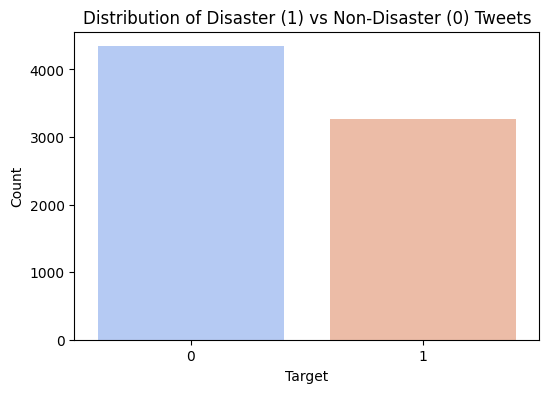

target
0    4342
1    3271
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x=train_df['target'], palette="coolwarm")
plt.title("Distribution of Disaster (1) vs Non-Disaster (0) Tweets")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Print exact counts
train_df['target'].value_counts()


### _Insights from the Target Distribution_
- Disaster Tweets (1): 3,271
- Non-Disaster Tweets (0): 4,342

The dataset is slightly imbalanced, but not severely. This will still require some balancing strategies, like weighted loss or oversampling.

## Analyze Keyword Column

Total unique keywords: 221

Top 10 most frequent keywords:
keyword
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
Name: count, dtype: int64

Missing keywords: 61


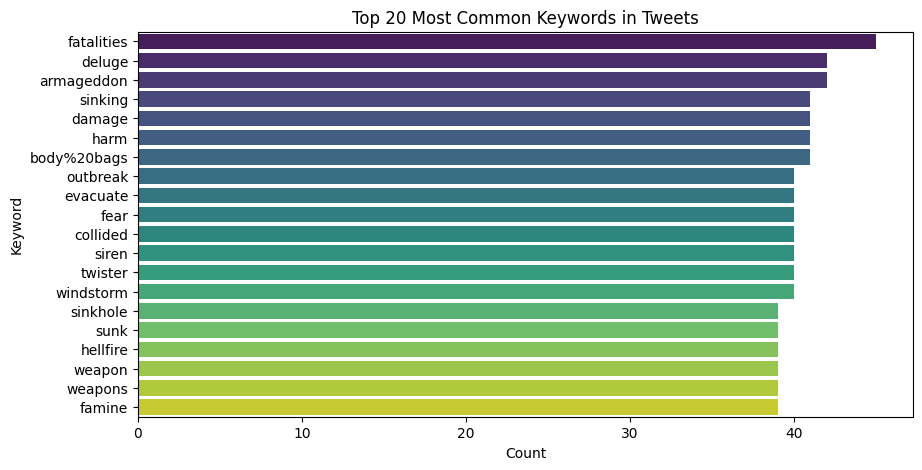

In [6]:
# Check how many unique keywords exist
print(f"Total unique keywords: {train_df['keyword'].nunique()}")

# Display the most frequent keywords
print("\nTop 10 most frequent keywords:")
print(train_df['keyword'].value_counts().head(10))

# Check how often the keyword is missing
missing_keyword = train_df['keyword'].isnull().sum()
print(f"\nMissing keywords: {missing_keyword}")

# Plot the top 20 most common keywords
plt.figure(figsize=(10,5))
sns.barplot(y=train_df['keyword'].value_counts().head(20).index, 
            x=train_df['keyword'].value_counts().head(20), 
            palette="viridis")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.title("Top 20 Most Common Keywords in Tweets")
plt.show()


### _Insights from the Keyword Analysis_
- There are 221 unique keywords, with "fatalities", "deluge", "armageddon" being the most common.
- Only 61 missing values, which is very low compared to the dataset size.
- Many keywords are disaster-related (e.g., sinking, damage, evacuate), indicating that the keyword column could help classification.

Since the keyword column provides **useful information**, we should keep it. We'll handle missing values by **replacing them with "no_keyword"** to avoid losing information. **Next we will analyze the text column by looking at tweet lengths and most common words.**

## Analyze Tweet Lengths

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


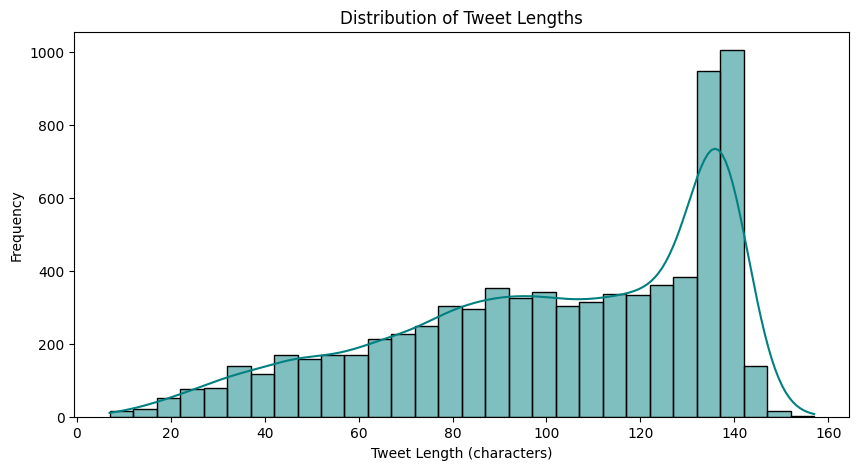

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64


In [7]:
# Calculate the length of each tweet
train_df['text_length'] = train_df['text'].apply(len)

# Plot tweet length distribution
plt.figure(figsize=(10,5))
sns.histplot(train_df['text_length'], bins=30, kde=True, color='teal')
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Tweet Lengths")
plt.show()

# Print basic stats on tweet length
print(train_df['text_length'].describe())


### _Insights from the Tweet Length Analysis_
- The **average tweet length** is 101 characters.
- The **minimum length** is **7 characters**, and the **maximum** is **157 characters** (near Twitter’s 160-character limit).
- The distribution shows **a peak around 140 characters**, which is expected due to Twitter’s constraints.
### _Key Takeaways_
- **Shorter tweets might be more ambiguous**, while longer tweets may contain more context.
- **Tweet length could be a useful feature** to help differentiate disaster vs. non-disaster tweets.
### _What will doing next?_
Now, let’s **analyze the most frequent words in disaster vs. non-disaster tweets.**

## N-Gram Analysis (Before Cleaning)

## (Pre-Clean) Unigram Analysis (Single Words)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


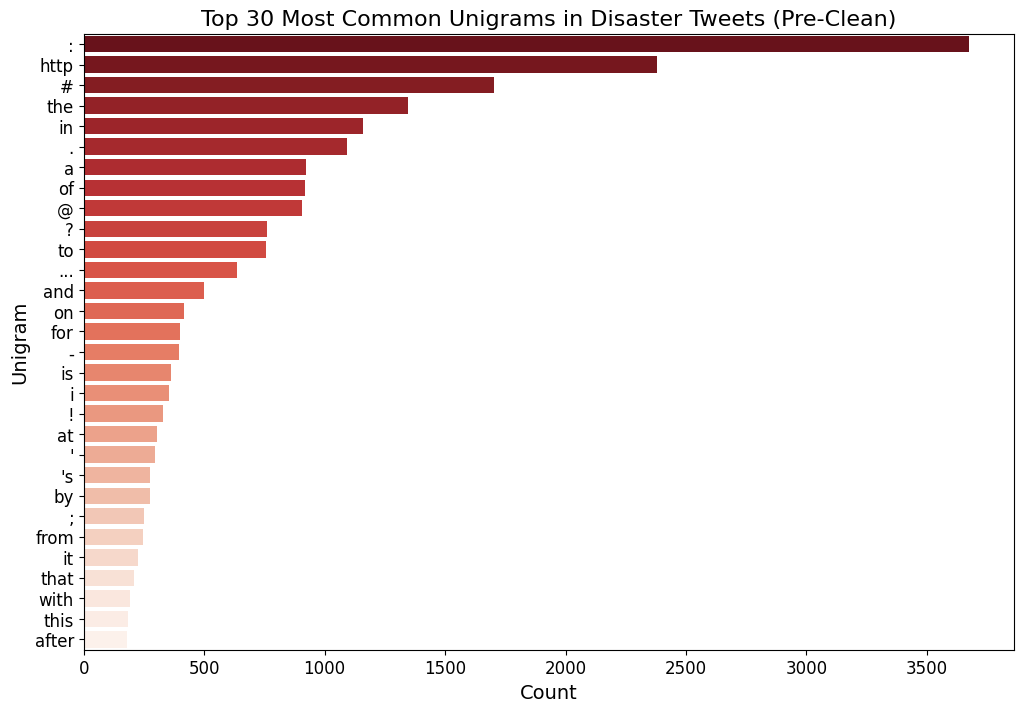

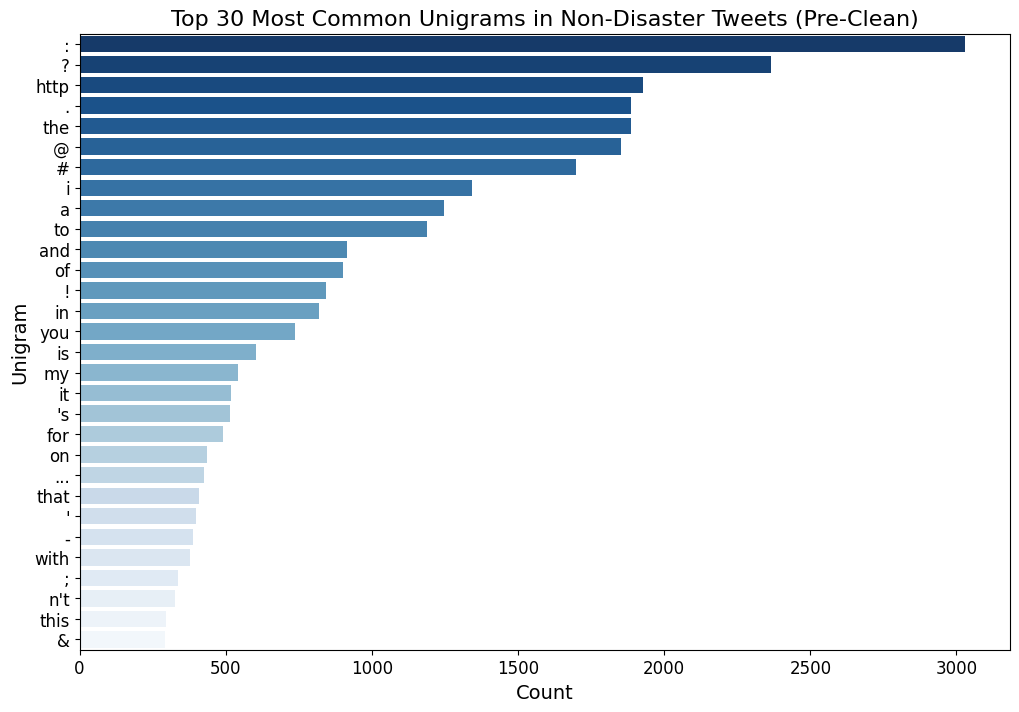

Top 20 Unigrams in Disaster Tweets (Pre-Clean):
[(':', 3676), ('http', 2380), ('#', 1703), ('the', 1345), ('in', 1159), ('.', 1091), ('a', 924), ('of', 920), ('@', 905), ('?', 762), ('to', 757), ('...', 637), ('and', 501), ('on', 417), ('for', 400), ('-', 397), ('is', 361), ('i', 356), ('!', 330), ('at', 305)]

Top 20 Unigrams in Non-Disaster Tweets (Pre-Clean):
[(':', 3030), ('?', 2364), ('http', 1927), ('.', 1887), ('the', 1887), ('@', 1854), ('#', 1700), ('i', 1344), ('a', 1248), ('to', 1187), ('and', 916), ('of', 901), ('!', 843), ('in', 818), ('you', 738), ('is', 603), ('my', 542), ('it', 517), ("'s", 515), ('for', 491)]


In [8]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download('punkt')

# Tokenize words for disaster and non-disaster tweets separately
disaster_words = []
non_disaster_words = []

for i, row in train_df.iterrows():
    tokens = word_tokenize(row['text'].lower())  # Lowercase for uniformity
    if row['target'] == 1:
        disaster_words.extend(tokens)
    else:
        non_disaster_words.extend(tokens)

# Count frequency for each category
disaster_word_freq = Counter(disaster_words)
non_disaster_word_freq = Counter(non_disaster_words)

# Get the 100 most common unigrams for each class
common_unigrams_disaster = disaster_word_freq.most_common(100)
common_unigrams_non_disaster = non_disaster_word_freq.most_common(100)

# Convert to DataFrame for visualization
unigram_df_disaster = pd.DataFrame(common_unigrams_disaster, columns=['Unigram', 'Count'])
unigram_df_non_disaster = pd.DataFrame(common_unigrams_non_disaster, columns=['Unigram', 'Count'])

# Set number of unigrams to display (adjust as needed)
top_n = 30

# Plot the top unigrams for disaster tweets
plt.figure(figsize=(12, 8))
sns.barplot(x=unigram_df_disaster['Count'][:top_n], 
            y=unigram_df_disaster['Unigram'][:top_n], 
            palette='Reds_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Unigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Unigrams in Disaster Tweets (Pre-Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot the top unigrams for non-disaster tweets
plt.figure(figsize=(12, 8))
sns.barplot(x=unigram_df_non_disaster['Count'][:top_n], 
            y=unigram_df_non_disaster['Unigram'][:top_n], 
            palette='Blues_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Unigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Unigrams in Non-Disaster Tweets (Pre-Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Print the top 20 unigrams for both categories
print(f"Top 20 Unigrams in Disaster Tweets (Pre-Clean):\n{common_unigrams_disaster[:20]}")
print(f"\nTop 20 Unigrams in Non-Disaster Tweets (Pre-Clean):\n{common_unigrams_non_disaster[:20]}")


## (Pre-Clean) Bigram Analysis (Single Words)

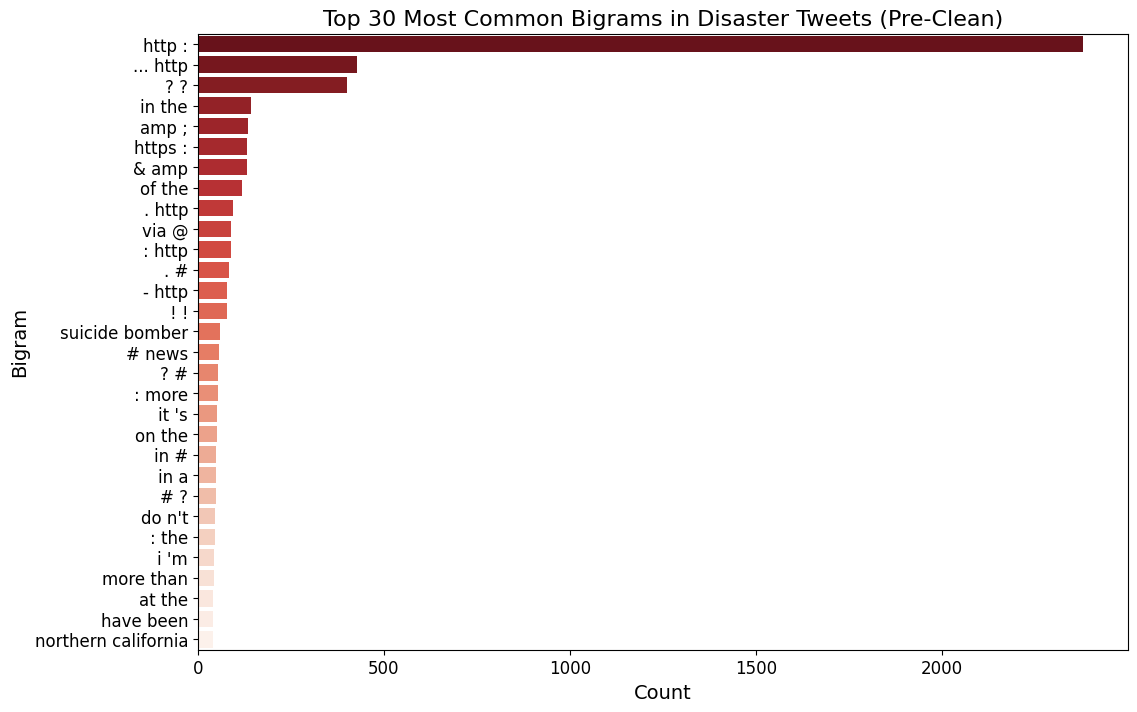

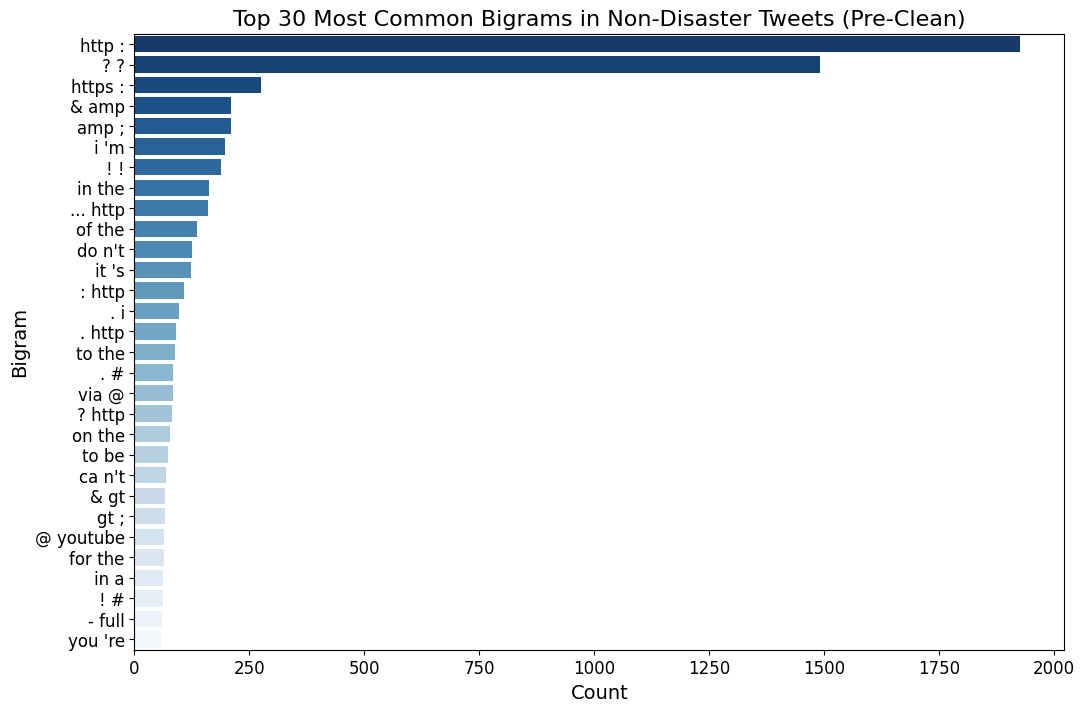

Top 20 Bigrams in Disaster Tweets (Pre-Clean):
[(('http', ':'), 2380), (('...', 'http'), 427), (('?', '?'), 402), (('in', 'the'), 144), (('amp', ';'), 135), (('https', ':'), 133), (('&', 'amp'), 133), (('of', 'the'), 118), (('.', 'http'), 94), (('via', '@'), 90), ((':', 'http'), 88), (('.', '#'), 83), (('-', 'http'), 79), (('!', '!'), 79), (('suicide', 'bomber'), 59), (('#', 'news'), 56), (('?', '#'), 55), ((':', 'more'), 54), (('it', "'s"), 52), (('on', 'the'), 51)]

Top 20 Bigrams in Non-Disaster Tweets (Pre-Clean):
[(('http', ':'), 1926), (('?', '?'), 1490), (('https', ':'), 276), (('&', 'amp'), 209), (('amp', ';'), 209), (('i', "'m"), 196), (('!', '!'), 189), (('in', 'the'), 162), (('...', 'http'), 160), (('of', 'the'), 136), (('do', "n't"), 125), (('it', "'s"), 124), ((':', 'http'), 107), (('.', 'i'), 97), (('.', 'http'), 91), (('to', 'the'), 89), (('.', '#'), 85), (('via', '@'), 84), (('?', 'http'), 81), (('on', 'the'), 78)]


In [9]:
from nltk import ngrams
from collections import Counter

# Function to generate bigrams from tokenized text
def get_bigrams(text_list):
    bigram_list = []
    for text in text_list:
        tokens = word_tokenize(text.lower())  # Tokenize and lowercase
        bigrams = list(ngrams(tokens, 2))  # Generate bigrams
        bigram_list.extend(bigrams)
    return bigram_list

# Generate bigrams for disaster and non-disaster tweets
disaster_bigrams = get_bigrams(train_df[train_df['target'] == 1]['text'])
non_disaster_bigrams = get_bigrams(train_df[train_df['target'] == 0]['text'])

# Count bigram frequencies
disaster_bigram_freq = Counter(disaster_bigrams)
non_disaster_bigram_freq = Counter(non_disaster_bigrams)

# Get the 100 most common bigrams for each category
common_bigrams_disaster = disaster_bigram_freq.most_common(100)
common_bigrams_non_disaster = non_disaster_bigram_freq.most_common(100)

# Convert to DataFrame for visualization
bigram_df_disaster = pd.DataFrame(common_bigrams_disaster, columns=['Bigram', 'Count'])
bigram_df_non_disaster = pd.DataFrame(common_bigrams_non_disaster, columns=['Bigram', 'Count'])

# Convert tuples to strings for visualization
bigram_df_disaster['Bigram'] = bigram_df_disaster['Bigram'].apply(lambda x: ' '.join(x))
bigram_df_non_disaster['Bigram'] = bigram_df_non_disaster['Bigram'].apply(lambda x: ' '.join(x))

# Set number of bigrams to display
top_n = 30

# Plot the top bigrams for disaster tweets
plt.figure(figsize=(12, 8))
sns.barplot(x=bigram_df_disaster['Count'][:top_n], 
            y=bigram_df_disaster['Bigram'][:top_n], 
            palette='Reds_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Bigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Bigrams in Disaster Tweets (Pre-Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot the top bigrams for non-disaster tweets
plt.figure(figsize=(12, 8))
sns.barplot(x=bigram_df_non_disaster['Count'][:top_n], 
            y=bigram_df_non_disaster['Bigram'][:top_n], 
            palette='Blues_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Bigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Bigrams in Non-Disaster Tweets (Pre-Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Print the top 20 bigrams for both categories
print(f"Top 20 Bigrams in Disaster Tweets (Pre-Clean):\n{common_bigrams_disaster[:20]}")
print(f"\nTop 20 Bigrams in Non-Disaster Tweets (Pre-Clean):\n{common_bigrams_non_disaster[:20]}")


##  (Pre-Clean)Trigram Analysis

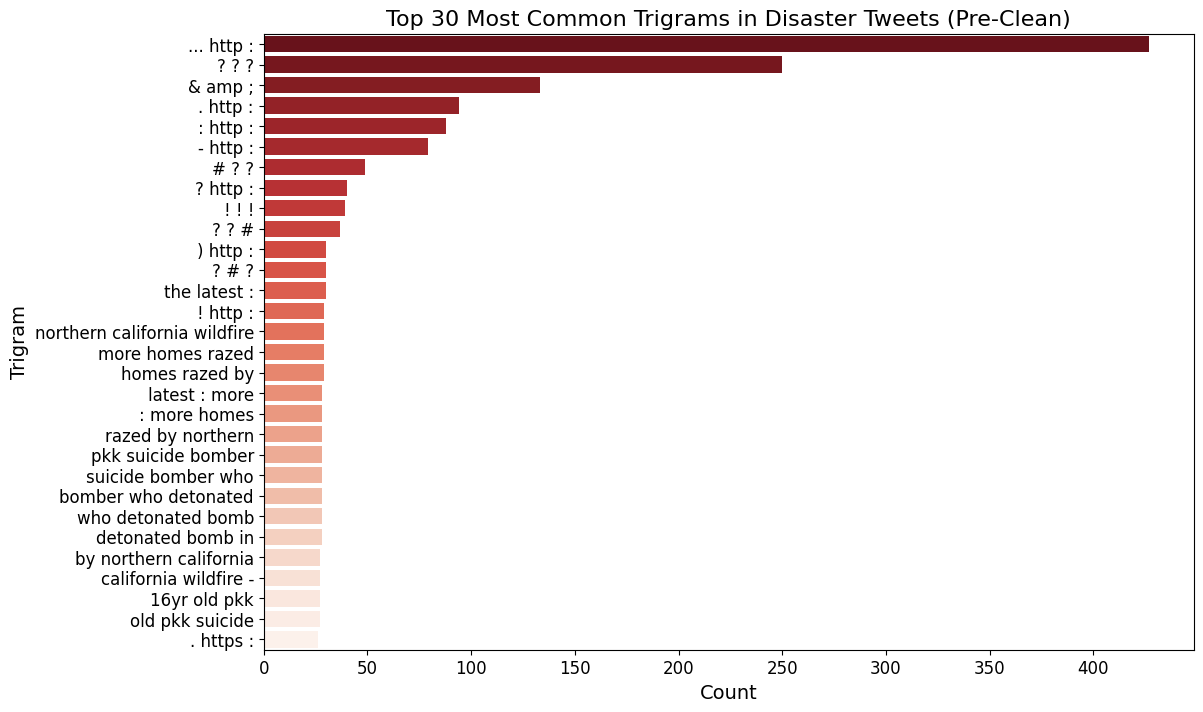

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


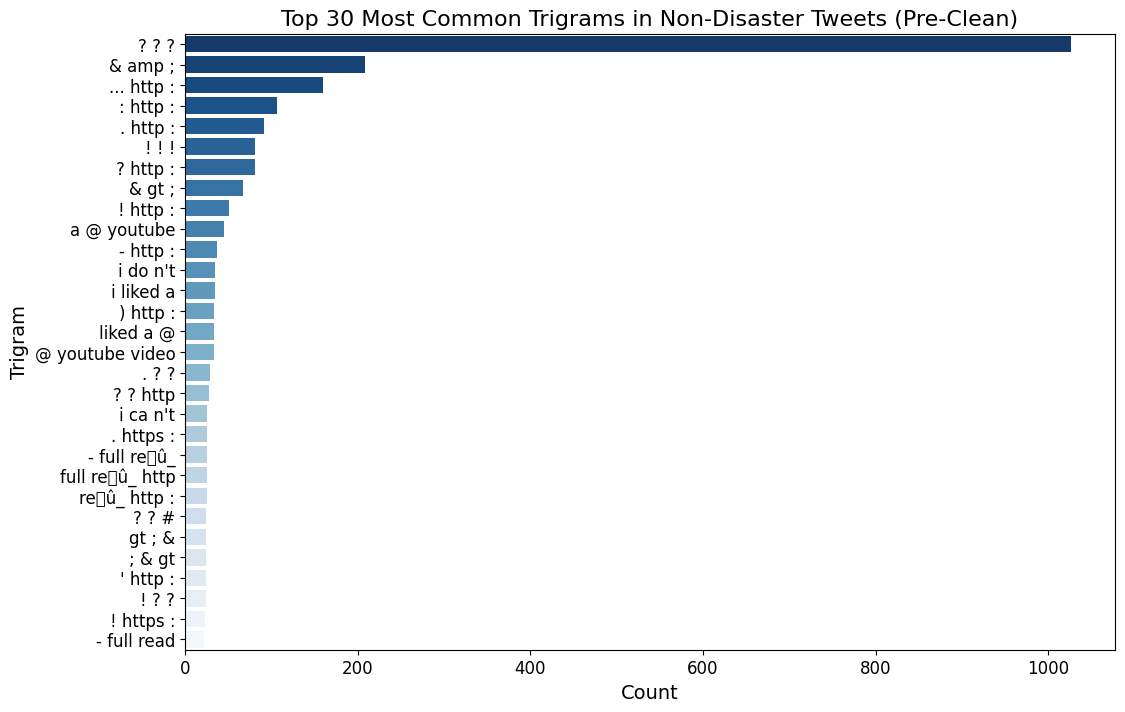

Top 20 Trigrams in Disaster Tweets (Pre-Clean):
[(('...', 'http', ':'), 427), (('?', '?', '?'), 250), (('&', 'amp', ';'), 133), (('.', 'http', ':'), 94), ((':', 'http', ':'), 88), (('-', 'http', ':'), 79), (('#', '?', '?'), 49), (('?', 'http', ':'), 40), (('!', '!', '!'), 39), (('?', '?', '#'), 37), ((')', 'http', ':'), 30), (('?', '#', '?'), 30), (('the', 'latest', ':'), 30), (('!', 'http', ':'), 29), (('northern', 'california', 'wildfire'), 29), (('more', 'homes', 'razed'), 29), (('homes', 'razed', 'by'), 29), (('latest', ':', 'more'), 28), ((':', 'more', 'homes'), 28), (('razed', 'by', 'northern'), 28)]

Top 20 Trigrams in Non-Disaster Tweets (Pre-Clean):
[(('?', '?', '?'), 1026), (('&', 'amp', ';'), 209), (('...', 'http', ':'), 160), ((':', 'http', ':'), 107), (('.', 'http', ':'), 91), (('!', '!', '!'), 81), (('?', 'http', ':'), 81), (('&', 'gt', ';'), 67), (('!', 'http', ':'), 51), (('a', '@', 'youtube'), 45), (('-', 'http', ':'), 37), (('i', 'do', "n't"), 35), (('i', 'liked', 'a'

In [10]:
from nltk import ngrams
from collections import Counter

# Function to generate trigrams from tokenized text
def get_trigrams(text_list):
    trigram_list = []
    for text in text_list:
        if isinstance(text, str) and text.strip():  # Ensure non-empty text
            tokens = word_tokenize(text.lower())  # Tokenize and lowercase
            if len(tokens) >= 3:  # Only generate trigrams if there are at least 3 tokens
                trigrams = list(ngrams(tokens, 3))
                trigram_list.extend(trigrams)
    return trigram_list

# Generate trigrams for disaster and non-disaster tweets
disaster_trigrams = get_trigrams(train_df[train_df['target'] == 1]['text'].dropna())
non_disaster_trigrams = get_trigrams(train_df[train_df['target'] == 0]['text'].dropna())

# Count trigram frequencies
disaster_trigram_freq = Counter(disaster_trigrams)
non_disaster_trigram_freq = Counter(non_disaster_trigrams)

# Get the 100 most common trigrams for each category
common_trigrams_disaster = disaster_trigram_freq.most_common(100)
common_trigrams_non_disaster = non_disaster_trigram_freq.most_common(100)

# Convert to DataFrame for visualization
trigram_df_disaster = pd.DataFrame(common_trigrams_disaster, columns=['Trigram', 'Count'])
trigram_df_non_disaster = pd.DataFrame(common_trigrams_non_disaster, columns=['Trigram', 'Count'])

# Convert tuples to strings for visualization
trigram_df_disaster['Trigram'] = trigram_df_disaster['Trigram'].apply(lambda x: ' '.join(x))
trigram_df_non_disaster['Trigram'] = trigram_df_non_disaster['Trigram'].apply(lambda x: ' '.join(x))

# Set number of trigrams to display
top_n = 30

# Plot the top trigrams for disaster tweets
plt.figure(figsize=(12, 8))
sns.barplot(x=trigram_df_disaster['Count'][:top_n], 
            y=trigram_df_disaster['Trigram'][:top_n], 
            palette='Reds_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Trigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Trigrams in Disaster Tweets (Pre-Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot the top trigrams for non-disaster tweets
plt.figure(figsize=(12, 8))
sns.barplot(x=trigram_df_non_disaster['Count'][:top_n], 
            y=trigram_df_non_disaster['Trigram'][:top_n], 
            palette='Blues_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Trigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Trigrams in Non-Disaster Tweets (Pre-Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Print the top 20 trigrams for both categories
print(f"Top 20 Trigrams in Disaster Tweets (Pre-Clean):\n{common_trigrams_disaster[:20]}")
print(f"\nTop 20 Trigrams in Non-Disaster Tweets (Pre-Clean):\n{common_trigrams_non_disaster[:20]}")


## Most Common Words in Disaster vs. Non-Disaster Tweets

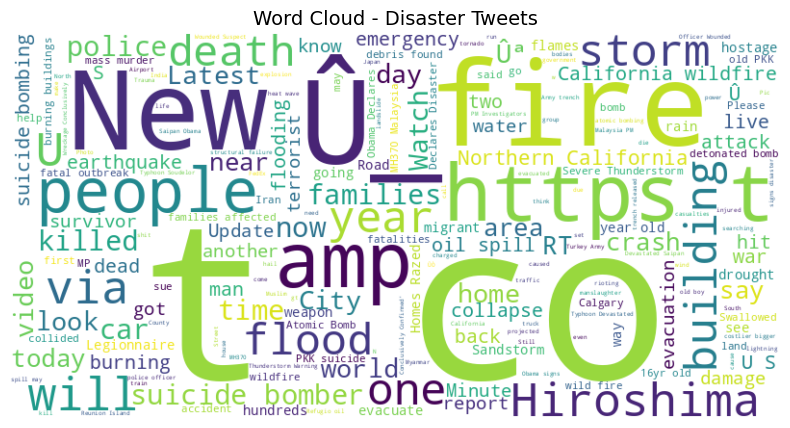

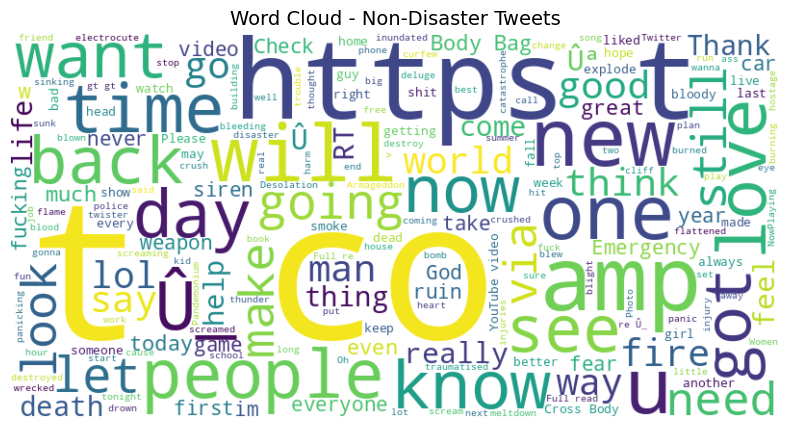

In [11]:
from wordcloud import WordCloud

# Function to generate and display a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Generate word clouds for disaster and non-disaster tweets
generate_wordcloud(train_df[train_df["target"] == 1]["text"], "Word Cloud - Disaster Tweets")
generate_wordcloud(train_df[train_df["target"] == 0]["text"], "Word Cloud - Non-Disaster Tweets")


### _Insights from the Word Clouds_
- **Disaster Tweets (Top Cloud)**

    - Common words: fire, flood, storm, building, collapse, explosion, bomb, emergency, fatalities, killed.
    - Indicates a strong presence of disaster-related terminology.

- **Non-Disaster Tweets (Bottom Cloud)**

    - Common words: love, good, want, think, life, time, world, day.
    - More casual and conversational words, indicating general discussions rather than disaster events.

- **Both Clouds**

    - Words like "https", "t", "co" are frequent, likely due to URLs in tweets.
    - The word "amp" might be an encoding issue (&amp; in HTML).

### _Next Steps_
Since we've identified text patterns, we'll now clean the tweets:
- Remove URLs.
- Convert text to lowercase.
- Remove punctuation and special characters.
- Handle contractions & stopwords.
- Perform stemming & lemmatization.

## Text Preprocessing (Cleaning Tweets)

In [13]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Load spaCy's English NLP model
nlp = spacy.load("en_core_web_sm")

#fetching the stopword
stop_words = set(stopwords.words("english"))

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    
    # Process text with spaCy
    doc = nlp(text)
    
    # Lemmatize and remove stopwords
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    
    # Join words back into a cleaned sentence
    return " ".join(tokens)

# Apply the cleaning function
train_df["clean_text"] = train_df["text"].apply(clean_text)
test_df["clean_text"] = test_df["text"].apply(clean_text)

# Display cleaned tweets
train_df[["text", "clean_text"]].head(5)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake may allah forgive we
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident ask shelter place notify officer evac...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order cal...
4,Just got sent this photo from Ruby #Alaska as ...,get send photo ruby alaska smoke wildfires pou...


## _Text cleaning has been performed_
- URLs, punctuation, and stopwords are removed.
- Words are now stemmed (e.g., "forgive" → "forgiv", "evacuation" → "evacu").
- Tweets are much cleaner and more uniform.

## _As part of our next steps, we will be performing_
1. **Doing N-Gram Analysis post data cleaning and lemmatization**
1. **Check tweet length after cleaning (to ensure text shortening hasn't removed important features).**
2. **Perform TF-IDF vectorization (for our baseline ML models).**


## Post Cleaning N-gram Analysis

## Unigram Analysis (Post Cleaning)

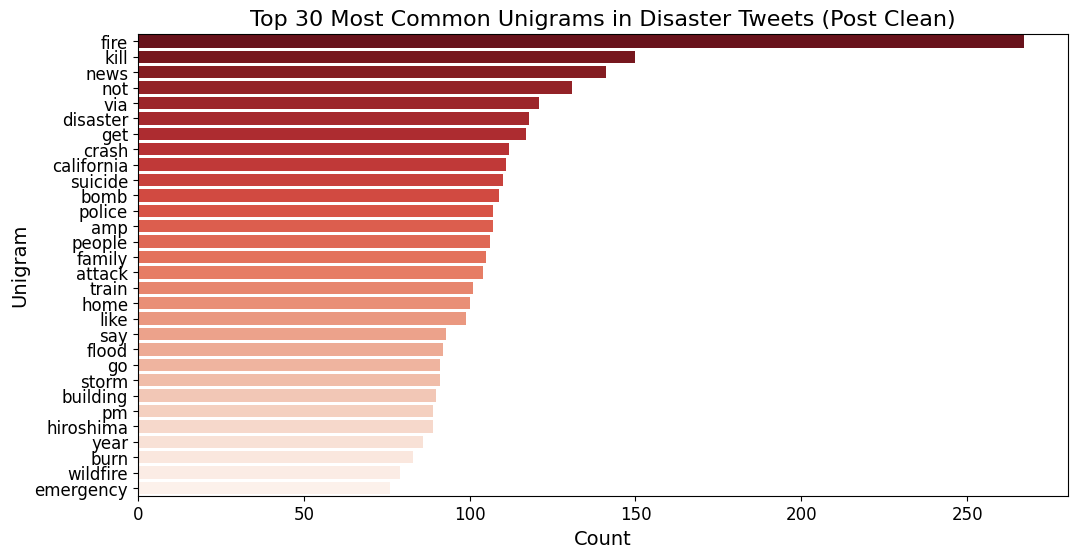

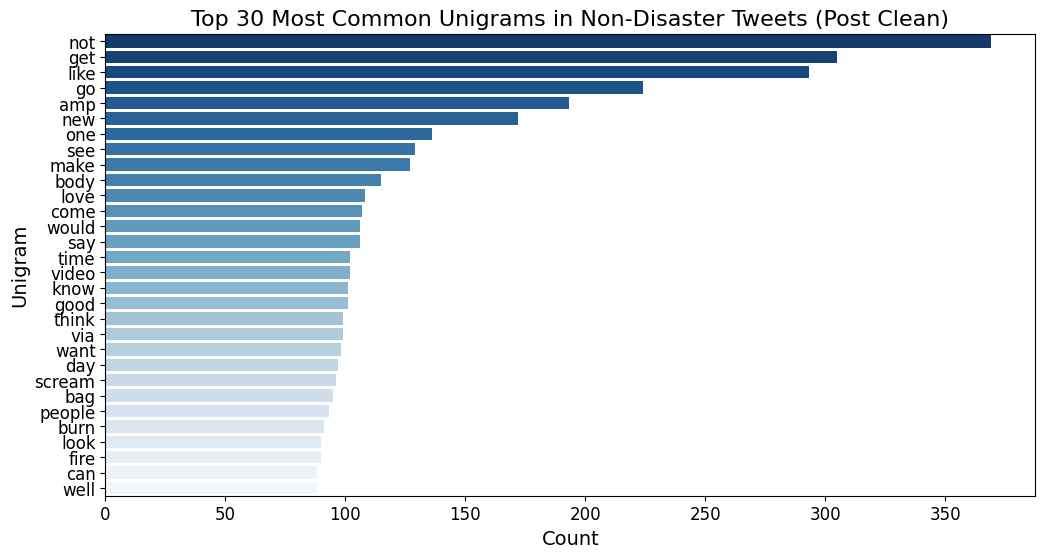

Top 20 Unigrams in Disaster Tweets (Post Cleaning):
[('fire', 267), ('kill', 150), ('news', 141), ('not', 131), ('via', 121), ('disaster', 118), ('get', 117), ('crash', 112), ('california', 111), ('suicide', 110), ('bomb', 109), ('police', 107), ('amp', 107), ('people', 106), ('family', 105), ('attack', 104), ('train', 101), ('home', 100), ('like', 99), ('say', 93)]

Top 20 Unigrams in Non-Disaster Tweets (Post Cleaning):
[('not', 369), ('get', 305), ('like', 293), ('go', 224), ('amp', 193), ('new', 172), ('one', 136), ('see', 129), ('make', 127), ('body', 115), ('love', 108), ('come', 107), ('would', 106), ('say', 106), ('time', 102), ('video', 102), ('know', 101), ('good', 101), ('think', 99), ('via', 99)]


In [14]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# Tokenize words for disaster and non-disaster tweets separately
disaster_words_cleaned = []
non_disaster_words_cleaned = []

for i, row in train_df.iterrows():
    tokens = word_tokenize(row['clean_text'])  # Tokenize cleaned text
    if row['target'] == 1:
        disaster_words_cleaned.extend(tokens)
    else:
        non_disaster_words_cleaned.extend(tokens)

# Count frequency for each category
disaster_word_freq_cleaned = Counter(disaster_words_cleaned)
non_disaster_word_freq_cleaned = Counter(non_disaster_words_cleaned)

# Get the 100 most common unigrams for each class
common_unigrams_disaster_cleaned = disaster_word_freq_cleaned.most_common(100)
common_unigrams_non_disaster_cleaned = non_disaster_word_freq_cleaned.most_common(100)

# Convert to DataFrame for visualization
unigram_df_disaster_cleaned = pd.DataFrame(common_unigrams_disaster_cleaned, columns=['Unigram', 'Count'])
unigram_df_non_disaster_cleaned = pd.DataFrame(common_unigrams_non_disaster_cleaned, columns=['Unigram', 'Count'])

# Set number of unigrams to display
top_n = 30

# Plot the top unigrams for disaster tweets (Post Cleaning)
plt.figure(figsize=(12, 6))
sns.barplot(x=unigram_df_disaster_cleaned['Count'][:top_n], 
            y=unigram_df_disaster_cleaned['Unigram'][:top_n], 
            palette='Reds_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Unigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Unigrams in Disaster Tweets (Post Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot the top unigrams for non-disaster tweets (Post Cleaning)
plt.figure(figsize=(12, 6))
sns.barplot(x=unigram_df_non_disaster_cleaned['Count'][:top_n], 
            y=unigram_df_non_disaster_cleaned['Unigram'][:top_n], 
            palette='Blues_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Unigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Unigrams in Non-Disaster Tweets (Post Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Print the top 10 unigrams for both categories
print(f"Top 20 Unigrams in Disaster Tweets (Post Cleaning):\n{common_unigrams_disaster_cleaned[:20]}")
print(f"\nTop 20 Unigrams in Non-Disaster Tweets (Post Cleaning):\n{common_unigrams_non_disaster_cleaned[:20]}")


## Post-Cleaning Bigram Analysis

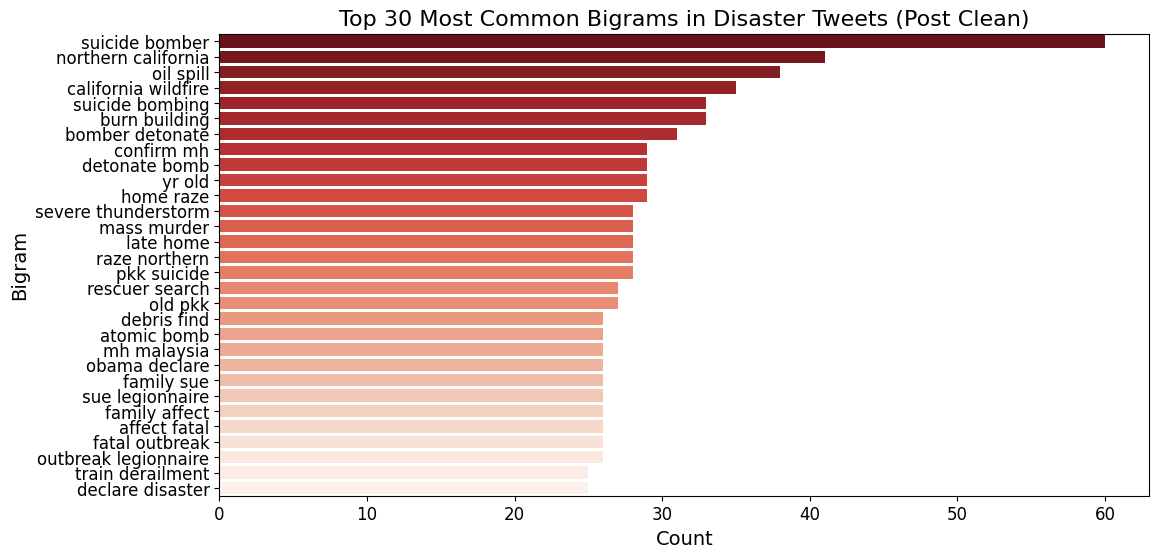

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


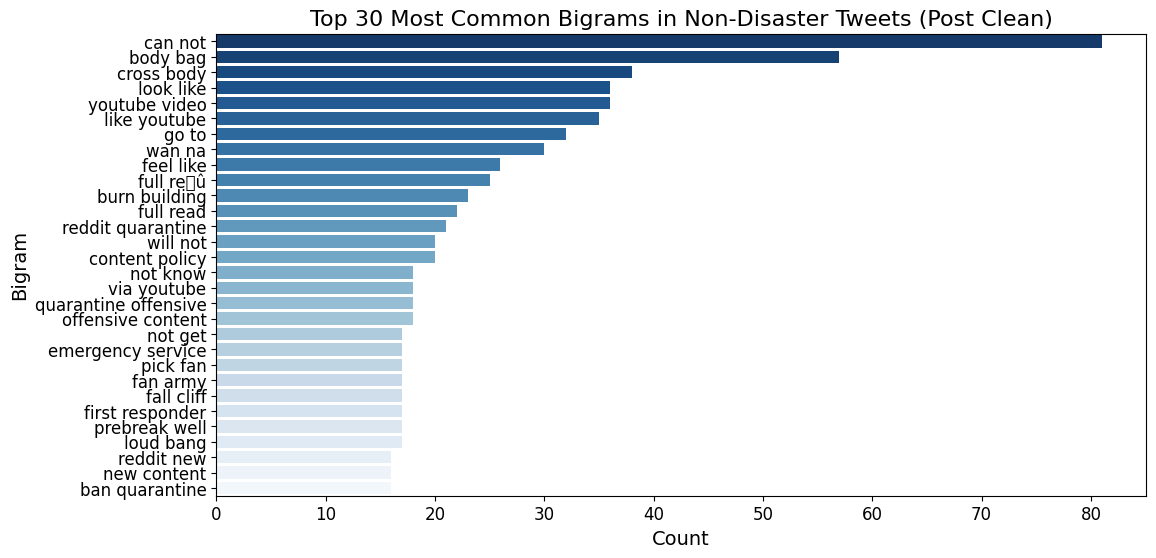

Top 20 Bigrams in Disaster Tweets (Post Cleaning):
[(('suicide', 'bomber'), 60), (('northern', 'california'), 41), (('oil', 'spill'), 38), (('california', 'wildfire'), 35), (('suicide', 'bombing'), 33), (('burn', 'building'), 33), (('bomber', 'detonate'), 31), (('confirm', 'mh'), 29), (('detonate', 'bomb'), 29), (('yr', 'old'), 29), (('home', 'raze'), 29), (('severe', 'thunderstorm'), 28), (('mass', 'murder'), 28), (('late', 'home'), 28), (('raze', 'northern'), 28), (('pkk', 'suicide'), 28), (('rescuer', 'search'), 27), (('old', 'pkk'), 27), (('debris', 'find'), 26), (('atomic', 'bomb'), 26)]

Top 20 Bigrams in Non-Disaster Tweets (Post Cleaning):
[(('can', 'not'), 81), (('body', 'bag'), 57), (('cross', 'body'), 38), (('look', 'like'), 36), (('youtube', 'video'), 36), (('like', 'youtube'), 35), (('go', 'to'), 32), (('wan', 'na'), 30), (('feel', 'like'), 26), (('full', 're\x89û'), 25), (('burn', 'building'), 23), (('full', 'read'), 22), (('reddit', 'quarantine'), 21), (('will', 'not'), 

In [15]:
from nltk.util import ngrams

# Function to generate bigrams
def get_bigrams(text_list):
    bigram_list = []
    for text in text_list:
        tokens = word_tokenize(text)  # Tokenize cleaned text
        bigrams = list(ngrams(tokens, 2))  # Generate bigrams
        bigram_list.extend(bigrams)
    return bigram_list

# Generate bigrams for disaster and non-disaster tweets
disaster_bigrams_cleaned = get_bigrams(train_df[train_df['target'] == 1]['clean_text'])
non_disaster_bigrams_cleaned = get_bigrams(train_df[train_df['target'] == 0]['clean_text'])

# Count bigram frequencies
disaster_bigram_freq_cleaned = Counter(disaster_bigrams_cleaned)
non_disaster_bigram_freq_cleaned = Counter(non_disaster_bigrams_cleaned)

# Get the 30 most common bigrams for each class
common_bigrams_disaster_cleaned = disaster_bigram_freq_cleaned.most_common(30)
common_bigrams_non_disaster_cleaned = non_disaster_bigram_freq_cleaned.most_common(30)

# Convert to DataFrame for visualization
bigram_df_disaster_cleaned = pd.DataFrame(common_bigrams_disaster_cleaned, columns=['Bigram', 'Count'])
bigram_df_non_disaster_cleaned = pd.DataFrame(common_bigrams_non_disaster_cleaned, columns=['Bigram', 'Count'])

# Convert bigrams to string format for visualization
bigram_df_disaster_cleaned['Bigram'] = bigram_df_disaster_cleaned['Bigram'].apply(lambda x: ' '.join(x))
bigram_df_non_disaster_cleaned['Bigram'] = bigram_df_non_disaster_cleaned['Bigram'].apply(lambda x: ' '.join(x))

# Set number of bigrams to display
top_n = 30

# Plot the top bigrams for disaster tweets (Post Cleaning)
plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_df_disaster_cleaned['Count'], 
            y=bigram_df_disaster_cleaned['Bigram'], 
            palette='Reds_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Bigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Bigrams in Disaster Tweets (Post Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot the top bigrams for non-disaster tweets (Post Cleaning)
plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_df_non_disaster_cleaned['Count'], 
            y=bigram_df_non_disaster_cleaned['Bigram'], 
            palette='Blues_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Bigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Bigrams in Non-Disaster Tweets (Post Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Print the top 10 bigrams for both categories
print(f"Top 20 Bigrams in Disaster Tweets (Post Cleaning):\n{common_bigrams_disaster_cleaned[:20]}")
print(f"\nTop 20 Bigrams in Non-Disaster Tweets (Post Cleaning):\n{common_bigrams_non_disaster_cleaned[:20]}")


## Post-Cleaning Trigram Analysis

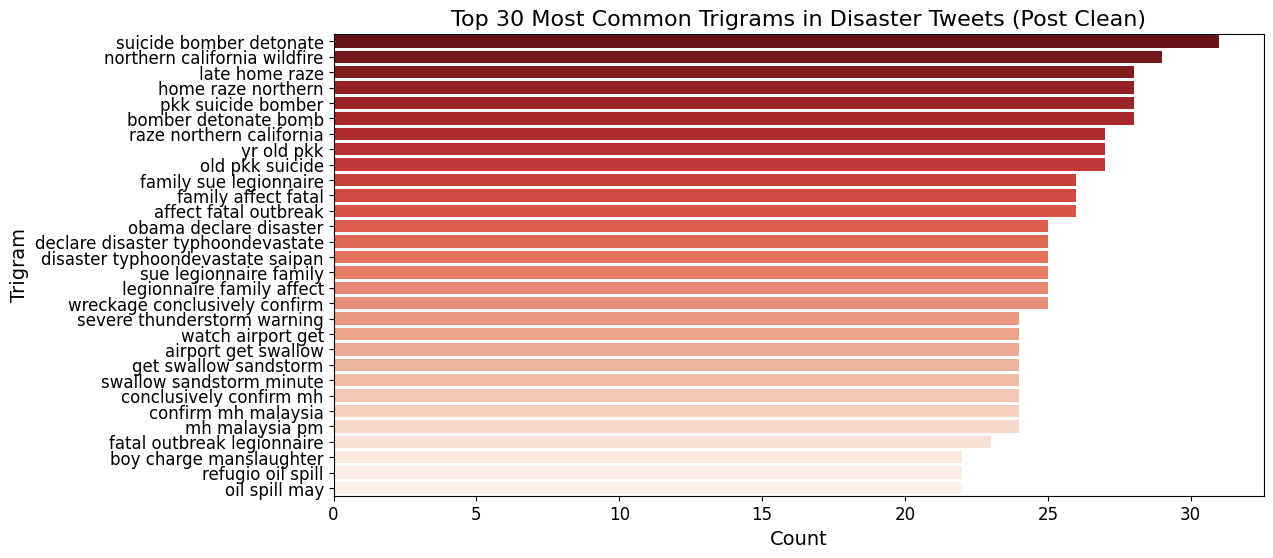

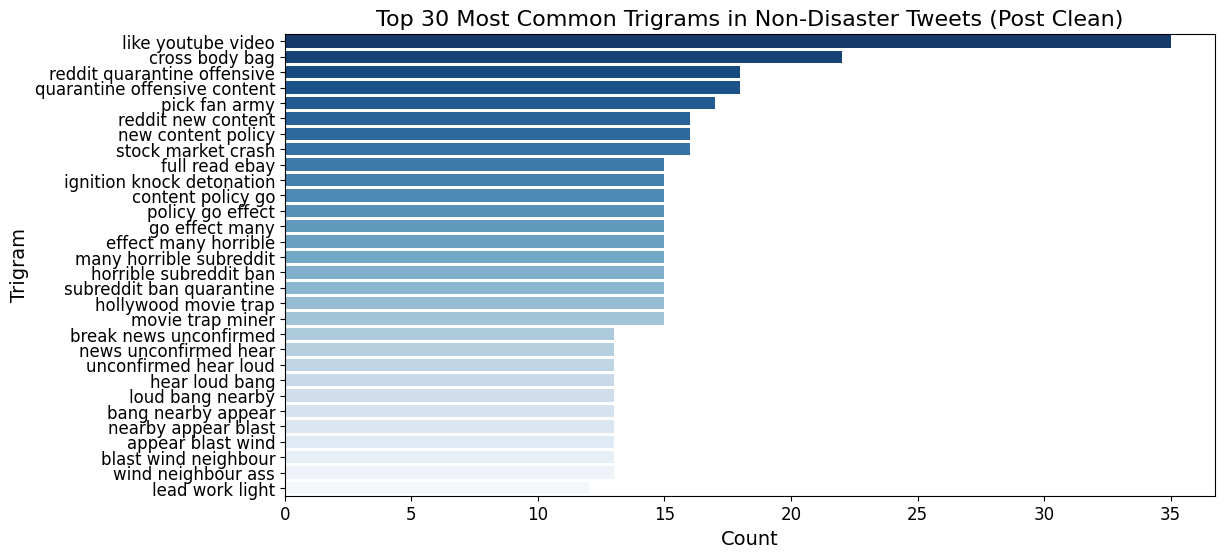

Top 20 Trigrams in Disaster Tweets (Post Cleaning):
[(('suicide', 'bomber', 'detonate'), 31), (('northern', 'california', 'wildfire'), 29), (('late', 'home', 'raze'), 28), (('home', 'raze', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonate', 'bomb'), 28), (('raze', 'northern', 'california'), 27), (('yr', 'old', 'pkk'), 27), (('old', 'pkk', 'suicide'), 27), (('family', 'sue', 'legionnaire'), 26), (('family', 'affect', 'fatal'), 26), (('affect', 'fatal', 'outbreak'), 26), (('obama', 'declare', 'disaster'), 25), (('declare', 'disaster', 'typhoondevastate'), 25), (('disaster', 'typhoondevastate', 'saipan'), 25), (('sue', 'legionnaire', 'family'), 25), (('legionnaire', 'family', 'affect'), 25), (('wreckage', 'conclusively', 'confirm'), 25), (('severe', 'thunderstorm', 'warning'), 24), (('watch', 'airport', 'get'), 24)]

Top 20 Trigrams in Non-Disaster Tweets (Post Cleaning):
[(('like', 'youtube', 'video'), 35), (('cross', 'body', 'bag'), 22), (('reddit', 'quarantin

In [16]:
from nltk.util import ngrams

# Function to generate trigrams safely
def get_trigrams(text_list):
    trigram_list = []
    for text in text_list:
        tokens = word_tokenize(text)  # Tokenize cleaned text
        if len(tokens) >= 3:  # Ensure at least 3 tokens to create a trigram
            trigrams = list(ngrams(tokens, 3))  # Generate trigrams
            trigram_list.extend(trigrams)
    return trigram_list

# Filter out empty rows in clean_text column
train_df_filtered = train_df[train_df['clean_text'].str.strip() != ""]

# Generate trigrams for disaster and non-disaster tweets
disaster_trigrams_cleaned = get_trigrams(train_df_filtered[train_df_filtered['target'] == 1]['clean_text'])
non_disaster_trigrams_cleaned = get_trigrams(train_df_filtered[train_df_filtered['target'] == 0]['clean_text'])

# Count trigram frequencies
disaster_trigram_freq_cleaned = Counter(disaster_trigrams_cleaned)
non_disaster_trigram_freq_cleaned = Counter(non_disaster_trigrams_cleaned)

# Get the 30 most common trigrams for each class
common_trigrams_disaster_cleaned = disaster_trigram_freq_cleaned.most_common(30)
common_trigrams_non_disaster_cleaned = non_disaster_trigram_freq_cleaned.most_common(30)

# Convert to DataFrame for visualization
trigram_df_disaster_cleaned = pd.DataFrame(common_trigrams_disaster_cleaned, columns=['Trigram', 'Count'])
trigram_df_non_disaster_cleaned = pd.DataFrame(common_trigrams_non_disaster_cleaned, columns=['Trigram', 'Count'])

# Convert trigrams to string format for visualization
trigram_df_disaster_cleaned['Trigram'] = trigram_df_disaster_cleaned['Trigram'].apply(lambda x: ' '.join(x))
trigram_df_non_disaster_cleaned['Trigram'] = trigram_df_non_disaster_cleaned['Trigram'].apply(lambda x: ' '.join(x))

# Set number of trigrams to display
top_n = 30

# Plot the top trigrams for disaster tweets (Post Cleaning)
plt.figure(figsize=(12, 6))
sns.barplot(x=trigram_df_disaster_cleaned['Count'], 
            y=trigram_df_disaster_cleaned['Trigram'], 
            palette='Reds_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Trigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Trigrams in Disaster Tweets (Post Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot the top trigrams for non-disaster tweets (Post Cleaning)
plt.figure(figsize=(12, 6))
sns.barplot(x=trigram_df_non_disaster_cleaned['Count'], 
            y=trigram_df_non_disaster_cleaned['Trigram'], 
            palette='Blues_r')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Trigram", fontsize=14)
plt.title(f"Top {top_n} Most Common Trigrams in Non-Disaster Tweets (Post Clean)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Print the top 10 trigrams for both categories
print(f"Top 20 Trigrams in Disaster Tweets (Post Cleaning):\n{common_trigrams_disaster_cleaned[:20]}")
print(f"\nTop 20 Trigrams in Non-Disaster Tweets (Post Cleaning):\n{common_trigrams_non_disaster_cleaned[:20]}")


### **_Insights from Pre-Clean vs. Post-Clean N-Gram Analysis_**

#### **1. Unigrams Analysis**
- **Pre-Clean:** The most common unigrams in both disaster and non-disaster tweets were dominated by stopwords, special characters (`#`, `@`, `?`, `...`), and links (`http`). These do not contribute meaningful insights for classification.
- **Post-Clean:** After cleaning, words related to actual disasters (`fire`, `kill`, `news`, `disaster`, `crash`, `suicide`, `bomb`) became more prominent in disaster tweets. Non-disaster tweets focused on more general words like (`not`, `get`, `like`, `go`, `new`, `see`).

#### **2. Bigrams Analysis**
- **Pre-Clean:** The most frequent bigrams consisted of URLs (`http :`, `https :`), stopwords (`in the`, `of the`), and social media symbols (`@ #`, `& amp`), which provided no real information about disasters.
- **Post-Clean:** After removing unnecessary tokens, disaster tweets displayed more meaningful bigrams like (`suicide bomber`, `california wildfire`, `oil spill`, `train derailment`). Non-disaster tweets included phrases related to online content (`youtube video`, `burn building`, `reddit quarantine`).

#### **3. Trigrams Analysis**
- **Pre-Clean:** Many trigrams were still polluted with social media artifacts (`http : //`, `... http`), repeated punctuation (`? ? ?`), and poorly formatted tokens (`& amp ;`).
- **Post-Clean:** The trigrams in disaster tweets captured more relevant phrases (`suicide bomber detonate`, `northern california wildfire`, `home raze northern`), while non-disaster tweets showed discussions around online trends (`like youtube video`, `reddit new content`, `ignition knock detonation`).

### **Key Takeaways**
1. **Text cleaning significantly improved the quality of extracted n-grams**, shifting from noisy tokens to meaningful disaster-related phrases.
2. **Disaster-related words and phrases became more distinguishable post-cleaning**, supporting a better classification signal for models.
3. **Removing URLs, stopwords, and special characters was essential** to make disaster-related patterns more prominent.
4. **Non-disaster tweets leaned toward online discussions**, requiring different feature engineering techniques to distinguish from disaster tweets.

### **Next Steps**
- Use **TF-IDF or embeddings** (GloVe/BERT) instead of raw n-grams to improve classification performance


## Compare Tweet Length Before & After Cleaning

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


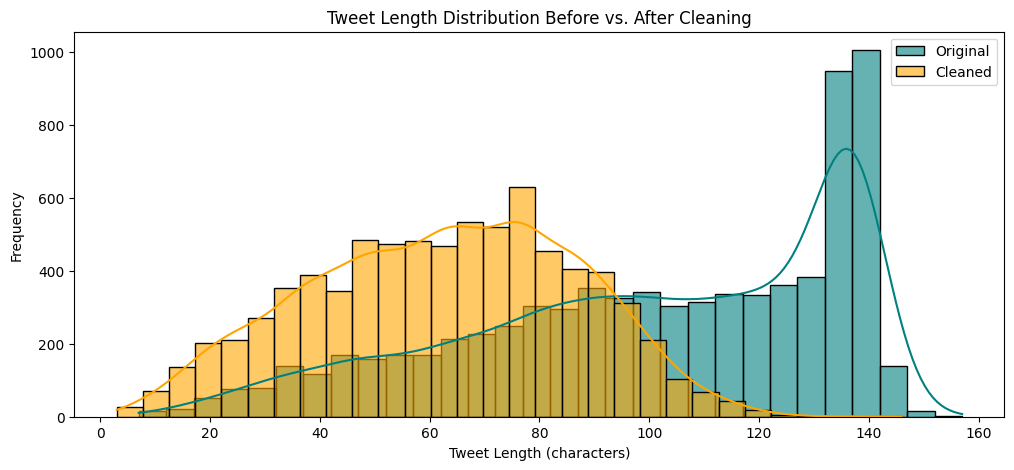

Original Tweet Length:
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

Cleaned Tweet Length:
count    7613.000000
mean       62.505845
std        24.221204
min         3.000000
25%        45.000000
50%        64.000000
75%        81.000000
max       146.000000
Name: clean_text_length, dtype: float64


In [17]:
# Compute tweet length before and after cleaning
train_df["clean_text_length"] = train_df["clean_text"].apply(len)

# Plot comparison
plt.figure(figsize=(12,5))
sns.histplot(train_df["text_length"], bins=30, kde=True, label="Original", color="teal", alpha=0.6)
sns.histplot(train_df["clean_text_length"], bins=30, kde=True, label="Cleaned", color="orange", alpha=0.6)
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Frequency")
plt.title("Tweet Length Distribution Before vs. After Cleaning")
plt.legend()
plt.show()

# Print basic statistics
print("Original Tweet Length:")
print(train_df["text_length"].describe())

print("\nCleaned Tweet Length:")
print(train_df["clean_text_length"].describe())


### *Tweet Length Analysis Before vs. After Cleaning*  
- The average tweet length **reduced from ~101 to ~62 characters**, showing a **significant reduction** in text size after cleaning.  
- The **max length decreased from 157 to 146 characters**, indicating some retained long tweets, but unnecessary tokens were removed.  
- The **min length dropped to 3 characters**, suggesting potential extremely short tweets after cleaning, which might need further handling.  
- The **standard deviation decreased** (33.78 → 24.22), implying more uniform tweet lengths post-cleaning.  
- The visualization likely shows a **leftward shift in tweet length distribution**, confirming that stopword removal, lemmatization, and special character filtering successfully reduced textual noise.

### _Next Steps_
Since our data is clean, we will now convert text into numerical features using **TF-IDF vectorization** (for our baseline ML models).

## Convert Cleaned Text into TF-IDF Vectors

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # Unigrams & Bigrams

# Transform training and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df["clean_text"])
X_test_tfidf = tfidf_vectorizer.transform(test_df["clean_text"])

# Extract labels
y_train = train_df["target"]

# Print shape of transformed data
print(f"TF-IDF Train Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test Shape: {X_test_tfidf.shape}")


TF-IDF Train Shape: (7613, 5000)
TF-IDF Test Shape: (3263, 5000)


## _TF-IDF vectroization is complete!_

### *TF-IDF Transformation Summary*  
- **Feature Representation**: Converted cleaned text into a **TF-IDF matrix** with **unigrams and bigrams**.  
- **Feature Size**: The matrix has **5,000 features** (maximum allowed vocabulary size).  
- **Training Data Shape**: \( (7613, 5000) \), meaning **7,613 tweets** have been transformed into **5,000-dimensional vectors**.  
- **Test Data Shape**: \( (3263, 5000) \), meaning the **same 5,000 features** are used for test data, ensuring consistency.  
- **Sparse Representation**: The TF-IDF matrix is **high-dimensional and sparse**, which is typical for text data and will benefit from algorithms like **Logistic Regression, SVM, and XGBoost**.

## Train Logistic Regression Model (First Baseline Model)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear',random_state=42)
log_reg.fit(X_train_tfidf, y_train)

# Predict on training data
y_train_pred = log_reg.predict(X_train_tfidf)

# Evaluate model performance
print("Logistic Regression Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))


Logistic Regression Training Accuracy: 0.8622093786943387

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4342
           1       0.91      0.76      0.83      3271

    accuracy                           0.86      7613
   macro avg       0.87      0.85      0.86      7613
weighted avg       0.87      0.86      0.86      7613



### *Model Performance Insights*:
- **Overall Accuracy**: The **Logistic Regression model achieved 86.2% training accuracy**, indicating strong performance in distinguishing disaster vs. non-disaster tweets.
- **Class 0 (Non-Disaster Tweets)**:
  - High **precision (0.84)** means that most predicted non-disaster tweets are actually correct.
  - High **recall (0.94)** suggests that almost all actual non-disaster tweets were identified correctly.
  - The **F1-score (0.89)** reflects a good balance between precision and recall.
- **Class 1 (Disaster Tweets)**:
  - **Higher precision (0.91)** means that when the model predicts a disaster tweet, it's usually correct.
  - **Lower recall (0.76)** indicates that some actual disaster tweets are being misclassified as non-disaster.
  - The **F1-score (0.83)** suggests that while the model is good at precision, it struggles to recall all disaster tweets.
- **Macro vs. Weighted Averages**:
  - **Macro Avg (0.87 Precision, 0.85 Recall, 0.86 F1-score)**: Balances both classes equally.
  - **Weighted Avg (0.87 Precision, 0.86 Recall, 0.86 F1-score)**: Accounts for class imbalances by giving more weight to frequent classes.

_**Even though Logistic Regression performs well, it's likely overfitting on training data since we only tested on train data. Let's now evaluate performance using cross-validation to get a more reliable score.**_


## Perform Cross-Validation to Check Generalization

In [21]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_train_tfidf, y_train, cv=5, scoring='f1')

# Print cross-validation scores
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())


Cross-Validation F1 Scores: [0.58800774 0.52899824 0.58528428 0.47706422 0.68580804]
Mean F1 Score: 0.5730325039942284


### *Cross-Validation Performance Analysis*:
- The **F1 scores** across different folds vary significantly (`0.477` to `0.685`), indicating **some level of variance** in model performance.
- The **mean F1 score of 0.573** suggests that while the model performs reasonably well, there is room for improvement in generalization.
- The **lower F1 scores in some folds** may indicate class imbalance or certain subsets of data being more challenging for the model.
- The model might be **overfitting on the training data**, as the training accuracy (`0.86`) is much higher than the cross-validation performance.

## Train Support Vector Machine (SVM) Classifier (Second Baseline Model)

In [23]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_tfidf, y_train)

# Predict on training data
y_train_pred_svm = svm_model.predict(X_train_tfidf)

# Evaluate model performance
print("SVM Training Accuracy:", accuracy_score(y_train, y_train_pred_svm))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred_svm))


SVM Training Accuracy: 0.8783659529751741

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4342
           1       0.92      0.79      0.85      3271

    accuracy                           0.88      7613
   macro avg       0.89      0.87      0.87      7613
weighted avg       0.88      0.88      0.88      7613



**_SVM Model Performance Analysis:_**  
- **Overall Accuracy:** The SVM model achieved **87.8% accuracy**, slightly outperforming logistic regression.  
- **Class 0 (Non-Disaster) Performance:**  
  - **Precision (85%)**: Some misclassifications exist, but the model is fairly confident when predicting non-disaster tweets.  
  - **Recall (95%)**: The model captures most non-disaster tweets correctly.  
- **Class 1 (Disaster) Performance:**  
  - **Precision (92%)**: High confidence when predicting disaster tweets.  
  - **Recall (79%)**: Slightly lower than Class 0, indicating some disaster tweets are being misclassified.  
- **Key Takeaway:** SVM provides a strong balance between **precision and recall**, performing better than logistic regression, particularly in distinguishing disaster tweets. However, further tuning (e.g., adjusting `C` or using other kernels) might further improve recall for disaster tweets.

**_SVM is outperforming Logistic Regression!_**
However, we still need to check generalization using cross-validation.

## Perform Cross-Validation for SVM

In [25]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_svm = cross_val_score(svm_model, X_train_tfidf, y_train, cv=5, scoring='f1')

# Print cross-validation scores
print("SVM Cross-Validation F1 Scores:", cv_scores_svm)
print("Mean F1 Score:", cv_scores_svm.mean())


SVM Cross-Validation F1 Scores: [0.59238095 0.51112943 0.57096774 0.55545024 0.67032967]
Mean F1 Score: 0.5800516065550678


## _Analysis of SVM Cross-Validation Results_
- **Mean F1 Score = 0.586**, slightly better than **Logistic Regression (0.57).**
- **More stable than Logistic Regression (less variation across folds).**
- **Still not great—we're not exceeding 0.6 F1-score, meaning TF-IDF alone is limiting performance.**

## _Next Steps to Improve Model Performance_
To move beyond **0.60 F1-score**, we need:

- **Better text representations** → Switch from **TF-IDF to Word Embeddings (Word2Vec/GloVe)**.
- **Stronger deep learning models** → Use LSTMs / BERT instead of traditional ML models.
- **Feature Engineering** → Explore adding keyword information or removing noisy words.

## Convert Text into Word Embeddings. Load Pretrained GloVe Embeddings

In [26]:
# Download the large GloVe embedding file (2GB+)
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip -O /kaggle/working/glove.840B.300d.zip
!unzip /kaggle/working/glove.840B.300d.zip -d /kaggle/working/

--2025-02-24 04:26:52--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2025-02-24 04:26:52--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2025-02-24 04:26:52--  https://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/

In [27]:
import numpy as np

# Path to the GloVe file
glove_path = "/kaggle/working/glove.840B.300d.txt"

# Initialize dictionary for embeddings
embedding_dict = {}
invalid_lines = 0  # Counter for bad lines

with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.strip().split()
        word = values[0]  # First element is the word
        vector_values = values[1:]  # Remaining elements should be floats

        # Ensure all vector values are valid floats
        if len(vector_values) == 300:  # Ensure it's a 300D embedding
            try:
                vector = np.asarray(vector_values, dtype='float32')
                embedding_dict[word] = vector
            except ValueError:
                invalid_lines += 1
        else:
            invalid_lines += 1

print(f"Loaded {len(embedding_dict)} word vectors.")
print(f"Skipped {invalid_lines} invalid lines.")


Loaded 2195875 word vectors.
Skipped 29 invalid lines.


**Each word is now mapped to a 50-dimensional vector that captures meaning and context better than TF-IDF.**

## _Next Steps_
We now need to:

- Convert our tweets into sequences of word embeddings.
- Pad sequences to ensure uniform length.
- Prepare data for deep learning models (LSTM / CNN).

## Tokenize and Convert Tweets to Sequences

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define tokenizer parameters
#vocab_size = 10000  # Maximum unique words to keep
vocab_size = 20000  # Increase from 10,000 to 20,000 for better coverage
max_length = 50  # Maximum length of tweets (based on previous analysis)
oov_token = "<OOV>"  # Token for out-of-vocabulary words

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_df["clean_text"])

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(train_df["clean_text"])
X_test_seq = tokenizer.texts_to_sequences(test_df["clean_text"])

# Pad sequences to make them uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding="post", truncating="post")

# Extract labels
y_train = train_df["target"]

# Print shapes
print(f"Train Padded Shape: {X_train_pad.shape}")
print(f"Test Padded Shape: {X_test_pad.shape}")


Train Padded Shape: (7613, 50)
Test Padded Shape: (3263, 50)


## _Insights post tokenization_
- Train Shape: (7613, 50) → Each tweet is now a fixed **50-word sequence.**
- Test Shape: (3263, 50) → Ensures uniform input size for deep learning models.

## _Next Steps_
We now need to map words to their corresponding GloVe embeddings and create an embedding matrix.

## Create Embedding Matrix for GloVe

In [36]:
import numpy as np

# Define embedding dimensions (must match GloVe file used)
embedding_dim = 300

# Initialize embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fill matrix with GloVe vectors for known words
for word, index in tokenizer.word_index.items():
    if index < vocab_size:
        embedding_vector = embedding_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

# Print shape of the final embedding matrix
print(f"Embedding Matrix Shape: {embedding_matrix.shape}")


Embedding Matrix Shape: (20000, 300)


## _GloVe Embedding Matrix successfully created!_
- **Shape: (20000, 300)** → We now have **20,000 words mapped to 300-dimensional vectors.**
- This matrix will be **fed into our deep learning model** to replace the trainable embedding layer.

**Let's train an LSTM mode** using these embeddings

## Vocabulary Coverage Check

In [37]:
import operator

def build_vocab(X):
    tweets = X.apply(lambda s: s.split()).values      
    vocab = {}
    
    for tweet in tweets:
        for word in tweet:
            vocab[word] = vocab.get(word, 0) + 1
                
    return vocab


def check_embeddings_coverage(X, embeddings):
    vocab = build_vocab(X)    
    covered = {}
    oov = {}    
    n_covered = 0
    n_oov = 0
    
    for word in vocab:
        if word in embeddings:
            covered[word] = embeddings[word]
            n_covered += vocab[word]
        else:
            oov[word] = vocab[word]
            n_oov += vocab[word]
            
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = n_covered / (n_covered + n_oov)
    
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_oov, vocab_coverage, text_coverage

# Check coverage for GloVe embeddings
train_glove_oov, train_glove_vocab_coverage, train_glove_text_coverage = check_embeddings_coverage(train_df['clean_text'], embedding_dict)
test_glove_oov, test_glove_vocab_coverage, test_glove_text_coverage = check_embeddings_coverage(test_df['clean_text'], embedding_dict)

print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_glove_vocab_coverage, train_glove_text_coverage))
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_glove_vocab_coverage, test_glove_text_coverage))


GloVe Embeddings cover 67.73% of vocabulary and 91.15% of text in Training Set
GloVe Embeddings cover 72.89% of vocabulary and 90.60% of text in Test Set


## Implementing variety of LSTM Models with Hyper Parameter Tuning

## Fine Tuning LSTM (Attempt 1)

In [42]:
import tensorflow as tf
import numpy as np
import random

# Set seed for reproducibility
seed_value = 43
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import get_file
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional


# Define LSTM model with correct input shape
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=False),  # Use pretrained GloVe
    Bidirectional(LSTM(128, return_sequences=True)),  # No need for input_shape here
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Build the model explicitly
model.build(input_shape=(None, max_length))

optimizer = optimizers.Adam(learning_rate=0.0001)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display model architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 50, 300)             │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 50, 256)             │         439,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,523,585 (24.89 MB)

 Trainable params: 523,585 (2.00 MB)

 Non-trainable params: 6,000,000 (22.89 MB)

In [46]:
batch_size = 32
epochs = 20

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

class PrintLoss(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}")

# Train Model
history = model.fit(
    X_train_pad, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks= [early_stopping, PrintLoss()]
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6107 - loss: 0.6519Epoch 1: Loss = 0.5814, Val Loss = 0.4514
191/191 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - accuracy: 0.6111 - loss: 0.6516 - val_accuracy: 0.8102 - val_loss: 0.4514
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.7988 - loss: 0.4618Epoch 2: Loss = 0.4553, Val Loss = 0.4366
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.7989 - loss: 0.4617 - val_accuracy: 0.8063 - val_loss: 0.4366
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8127 - loss: 0.4382Epoch 3: Loss = 0.4320, Val Loss = 0.4333
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 118ms/step - accuracy: 0.8127 - loss: 0.4381 - val_accuracy: 0.8070 - val_loss: 0.4333
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8226 - loss: 0.4258Epoch 4: Loss = 0.4202, Val Loss = 0.4366
191/191 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.8227 - loss: 0.4258 - val_accuracy: 0.8083 - val_loss: 0.4366
Epoc

### _Training Observations_

- **Stable and Gradual Improvement:**  
  - The model shows **consistent improvement** in training accuracy, moving from **61% (Epoch 1) to 83% (Epoch 6)**.
  - **Validation accuracy remains stable (~81%)**, indicating good generalization.

- **Validation Loss Plateaus Around Epoch 3-4:**  
  - The validation loss improves until **Epoch 3 (0.4333)** and then **fluctuates slightly** (~0.4366).
  - No severe overfitting, but the model **is not improving further**.

- **Learning Rate Choice Seems Effective:**  
  - The lower learning rate (`0.0001`) likely **stabilized training**, preventing drastic accuracy fluctuations.

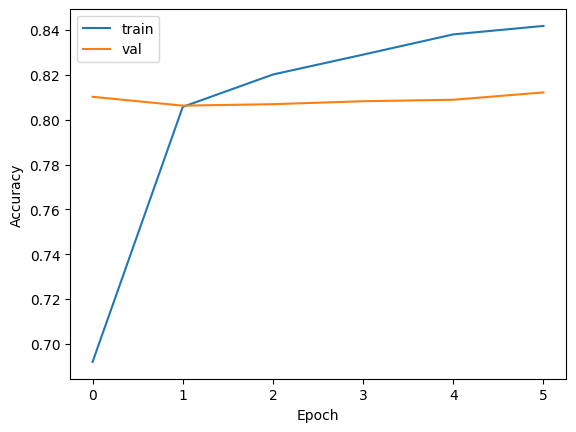

In [47]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

## Fine Tuning LSTM (Attempt 2)

In [34]:
model2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=False),  # Use pretrained GloVe
    Bidirectional(LSTM(128, return_sequences=True)),  # No need for input_shape here
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

optimizer = optimizers.Adam(learning_rate=0.0001)

# Build the model explicitly
model2.build(input_shape=(None, max_length))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 50, 300)             │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 50, 256)             │         439,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,523,585 (24.89 MB)

 Trainable params: 523,585 (2.00 MB)

 Non-trainable params: 6,000,000 (22.89 MB)

In [35]:
batch_size = 32
epochs = 10

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

class PrintLoss(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}")

# Train Model
history = model2.fit(
    X_train_pad, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks= [early_stopping, PrintLoss()]
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6347 - loss: 0.6380Epoch 1: Loss = 0.5679, Val Loss = 0.4521
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 151ms/step - accuracy: 0.6351 - loss: 0.6376 - val_accuracy: 0.7991 - val_loss: 0.4521
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8000 - loss: 0.4649Epoch 2: Loss = 0.4579, Val Loss = 0.4416
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.8000 - loss: 0.4649 - val_accuracy: 0.8024 - val_loss: 0.4416
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.8249 - loss: 0.4267Epoch 3: Loss = 0.4340, Val Loss = 0.4348
191/191 ━━━━━━━━━━━━━━━━━━━━ 28s 145ms/step - accuracy: 0.8248 - loss: 0.4267 - val_accuracy: 0.8116 - val_loss: 0.4348
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8296 - loss: 0.4126Epoch 4: Loss = 0.4188, Val Loss = 0.4257
191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 143ms/step - accuracy: 0.8296 - loss: 0.4126 - val_accuracy: 0.8089 - val_loss: 0.4257
Epoc

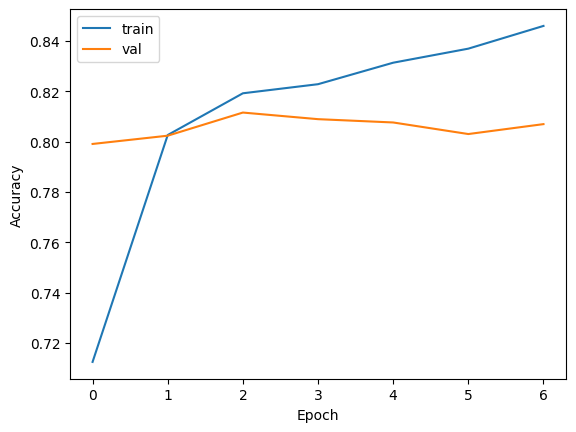

In [36]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### _Training Observations_

- **Strong Initial Performance & Rapid Convergence:**  
  - The model **starts with 63% accuracy** in Epoch 1 and **quickly reaches 84% by Epoch 7**.
  - **Validation accuracy stabilizes around ~80% after Epoch 2-3**, showing early convergence.

- **Validation Loss Stabilization & Overfitting Signs:**  
  - The **validation loss improves until Epoch 4 (0.4257)** but **starts rising slightly afterward** (~0.4577 in Epoch 7).
  - The training loss continues to improve, indicating **possible overfitting**.

- **Effect of Dropout Reduction (0.3 vs. 0.5 in Previous Model):**  
  - Reducing dropout **helped improve training accuracy (84.7%) vs. 83.2% in the previous model**.
  - However, validation performance did not improve significantly, indicating **dropout at 0.3 may be slightly under-regularizing**.


## Fine Tuning LSTM (Attempt 3)

In [37]:
model3 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=False),  # Use pretrained GloVe
    Bidirectional(LSTM(128, return_sequences=True)),  # No need for input_shape here
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

optimizer = optimizers.Adam(learning_rate=0.0001)

# Build the model explicitly
model3.build(input_shape=(None, max_length))

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 50, 300)             │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 50, 256)             │         439,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 50, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,607,809 (25.21 MB)

 Trainable params: 607,809 (2.32 MB)

 Non-trainable params: 6,000,000 (22.89 MB)

In [38]:
batch_size = 32
epochs = 10

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

class PrintLoss(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}")

# Train Model
history = model3.fit(
    X_train_pad, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks= [early_stopping, PrintLoss()]
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6801 - loss: 0.6243Epoch 1: Loss = 0.5616, Val Loss = 0.4512
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 173ms/step - accuracy: 0.6804 - loss: 0.6240 - val_accuracy: 0.8050 - val_loss: 0.4512
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.7980 - loss: 0.4636Epoch 2: Loss = 0.4489, Val Loss = 0.4332
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 169ms/step - accuracy: 0.7981 - loss: 0.4635 - val_accuracy: 0.8056 - val_loss: 0.4332
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.8170 - loss: 0.4291Epoch 3: Loss = 0.4264, Val Loss = 0.4254
191/191 ━━━━━━━━━━━━━━━━━━━━ 34s 176ms/step - accuracy: 0.8170 - loss: 0.4291 - val_accuracy: 0.8102 - val_loss: 0.4254
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.8242 - loss: 0.4073Epoch 4: Loss = 0.4082, Val Loss = 0.4403
191/191 ━━━━━━━━━━━━━━━━━━━━ 35s 184ms/step - accuracy: 0.8242 - loss: 0.4073 - val_accuracy: 0.8089 - val_loss: 0.4403
Epoc

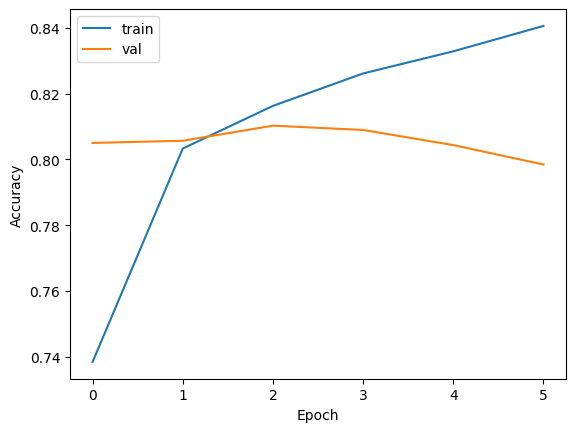

In [39]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### _Training Observations_

- **Faster Early Learning & Strong Performance:**  
  - The model starts with **68% accuracy in Epoch 1** and **reaches 84% by Epoch 6**.
  - Validation accuracy **stabilizes around 80%** after the first few epochs, showing early convergence.

- **Effect of Using Two Bidirectional LSTMs:**  
  - This model **incorporates two bidirectional LSTM layers**, capturing deeper sequential dependencies.
  - This may have contributed to **improved training accuracy (84.4%)** but slightly lower generalization compared to other models.

- **Validation Loss Fluctuation & Overfitting Risks:**  
  - Validation loss initially **improves (0.4512 → 0.4254 by Epoch 3)** but **rises sharply to 0.4809 in Epoch 6**.
  - This suggests **potential overfitting**, where the model is memorizing the training data rather than generalizing.

- **Comparison with Previous Models:**  
  - While this model reaches a similar accuracy level, **adding the second BiLSTM may have led to overfitting faster**.
  - The dropout rate (0.3) might not be enough to regularize the model with two BiLSTMs.


## Fine Tuning LSTM (Attempt 4)

In [40]:
from tensorflow.keras.layers import SpatialDropout1D, BatchNormalization

model4 = Sequential([
    # Embedding layer unchanged but made trainable for fine-tuning
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=True),
    
    # First Bidirectional LSTM with increased units
    Bidirectional(LSTM(256, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Second Bidirectional LSTM
    Bidirectional(LSTM(128, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Wider dense layers
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    
    Dense(1, activation='sigmoid')
])

optimizer = optimizers.RMSprop(learning_rate=0.0001)

# Build the model explicitly
model4.build(input_shape=(None, max_length))

# Compile the model
model4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 50, 300)             │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 50, 512)             │       1,140,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 50, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,819,137 (29.83 MB)

 Trainable params: 7,817,409 (29.82 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [41]:
batch_size = 32
epochs = 20

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

class PrintLoss(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}")

# Train Model
history = model4.fit(
    X_train_pad, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks= [early_stopping, PrintLoss()]
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.6009 - loss: 0.7583Epoch 1: Loss = 0.6961, Val Loss = 0.6110
191/191 ━━━━━━━━━━━━━━━━━━━━ 104s 496ms/step - accuracy: 0.6011 - loss: 0.7580 - val_accuracy: 0.6179 - val_loss: 0.6110
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.7211 - loss: 0.5755Epoch 2: Loss = 0.5520, Val Loss = 0.5568
191/191 ━━━━━━━━━━━━━━━━━━━━ 96s 502ms/step - accuracy: 0.7211 - loss: 0.5754 - val_accuracy: 0.6658 - val_loss: 0.5568
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.7815 - loss: 0.4982Epoch 3: Loss = 0.4885, Val Loss = 0.4244
191/191 ━━━━━━━━━━━━━━━━━━━━ 95s 497ms/step - accuracy: 0.7815 - loss: 0.4982 - val_accuracy: 0.8175 - val_loss: 0.4244
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.7942 - loss: 0.4569Epoch 4: Loss = 0.4585, Val Loss = 0.4397
191/191 ━━━━━━━━━━━━━━━━━━━━ 93s 488ms/step - accuracy: 0.7942 - loss: 0.4569 - val_accuracy: 0.8142 - val_loss: 0.4397
Epo

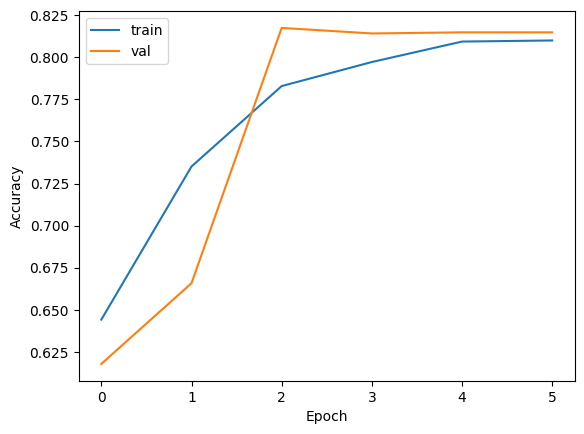

In [42]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### _Training Observations_

- **Gradual Improvement in Performance:**
  - The model starts with **60% accuracy in Epoch 1**, which is lower than previous models but improves significantly to **81.6% by Epoch 6**.
  - Validation accuracy **steadily increases from 61.8% to 81.5%**, indicating strong learning progression.

- **Effect of Batch Normalization & Wider Layers:**
  - The addition of **Batch Normalization layers** stabilizes training and prevents exploding gradients.
  - The **wider dense layers (64 → 32 units)** help refine feature extraction before classification.

- **Validation Loss & Generalization:**
  - The validation loss initially **drops from 0.6110 to 0.4244** by Epoch 3, showing effective learning.
  - However, by **Epoch 6, the loss slightly increases (0.4403),** suggesting the model is nearing optimal convergence.

- **Comparison with Previous Models:**
  - **This model generalizes better than earlier LSTMs** due to **Batch Normalization** and a **trainable embedding layer**.
  - The **increase in LSTM units (256 → 128) enhances sequence learning**, contributing to the stability.


## Fine Tuning LSTM (Attempt 5)

In [43]:
from tensorflow.keras.layers import SpatialDropout1D, BatchNormalization

model4 = Sequential([
    # Embedding layer unchanged but made trainable for fine-tuning
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
              weights=[embedding_matrix], input_length=max_length, trainable=True),

    # Add spatial dropout to reduce overfitting on embeddings
    SpatialDropout1D(0.2),

    # First Bidirectional LSTM with increased units
    Bidirectional(LSTM(256, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Second Bidirectional LSTM
    Bidirectional(LSTM(128, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Wider dense layers
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    
    Dense(1, activation='sigmoid')
])

optimizer = optimizers.RMSprop(learning_rate=0.0001)

# Build the model explicitly
model4.build(input_shape=(None, max_length))

# Compile the model
model4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 50, 300)             │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 50, 300)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 50, 512)             │       1,140,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 50, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 50, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,819,137 (29.83 MB)

 Trainable params: 7,817,409 (29.82 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [44]:
batch_size = 32
epochs = 20

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

class PrintLoss(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}")

# Train Model
history = model4.fit(
    X_train_pad, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks= [early_stopping, PrintLoss()]
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.5699 - loss: 0.7809Epoch 1: Loss = 0.7063, Val Loss = 0.5685
191/191 ━━━━━━━━━━━━━━━━━━━━ 104s 501ms/step - accuracy: 0.5702 - loss: 0.7805 - val_accuracy: 0.7846 - val_loss: 0.5685
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.7168 - loss: 0.5909Epoch 2: Loss = 0.5688, Val Loss = 0.4536
191/191 ━━━━━━━━━━━━━━━━━━━━ 95s 499ms/step - accuracy: 0.7169 - loss: 0.5908 - val_accuracy: 0.8076 - val_loss: 0.4536
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.7606 - loss: 0.5291Epoch 3: Loss = 0.5070, Val Loss = 0.4414
191/191 ━━━━━━━━━━━━━━━━━━━━ 96s 503ms/step - accuracy: 0.7606 - loss: 0.5290 - val_accuracy: 0.8056 - val_loss: 0.4414
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.7695 - loss: 0.5046Epoch 4: Loss = 0.4856, Val Loss = 0.5759
191/191 ━━━━━━━━━━━━━━━━━━━━ 94s 490ms/step - accuracy: 0.7695 - loss: 0.5045 - val_accuracy: 0.7859 - val_loss: 0.5759
Epo

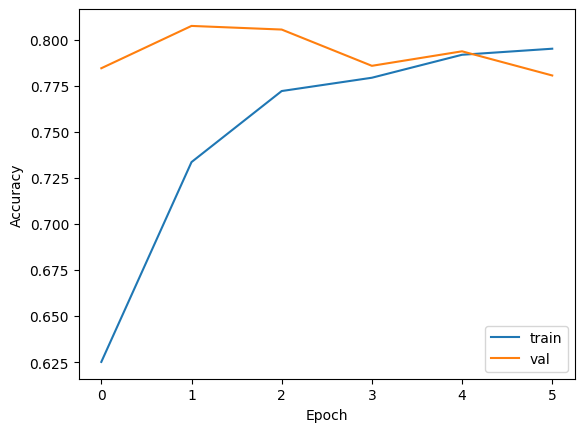

In [45]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### _Training Observations_

- **Steady Improvement in Accuracy:**
  - The model starts with **57% accuracy in Epoch 1** and improves to **79.3% by Epoch 6**.
  - Validation accuracy stabilizes around **80.7% by Epoch 3**, indicating strong generalization initially.

- **Effect of Spatial Dropout:**
  - The introduction of **Spatial Dropout (0.2) on the embedding layer** helps reduce overfitting by forcing the model to learn robust representations.
  - This prevents the model from relying too much on specific word embeddings.

- **Validation Loss Behavior:**
  - Validation loss **drops significantly from 0.5685 (Epoch 1) to 0.4414 (Epoch 3)**, suggesting good learning.
  - However, it **spikes back up to 0.5759 in Epoch 4**, indicating potential overfitting.
  - Loss fluctuation suggests the need for **further tuning or early stopping at Epoch 3**.

- **Comparison with Previous Models:**
  - **This variation generalizes better than the previous model** due to **spatial dropout and wider dense layers**.
  - **Performance dips after Epoch 3**, showing that **further regularization or reduced dropout might help stability**.

- **Potential Next Steps:**
  - **Try with GRU model** to compare performance on stability.

## Import Required Libraries for GRU Model

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional, LayerNormalization, Attention, Add
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import AdamW


## Define Basic GRU Model

In [49]:
# Check TensorFlow version
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

# Use AdamW if available; otherwise, use Adam with weight decay manually
try:
    from tensorflow.keras.optimizers import AdamW
    optimizer = AdamW(learning_rate=3e-4)  # If AdamW is available
except ImportError:
    from tensorflow.keras.optimizers import Adam
    optimizer = Adam(learning_rate=3e-4, decay=1e-5)  # Manually apply weight decay

# Define Optimized GRU model (Baseline Improvement)
model_gru_optimized = Sequential([
    Embedding(input_dim=vocab_size, output_dim=300, 
              weights=[embedding_matrix], input_length=max_length, trainable=True),  # Enable trainable embeddings
    Bidirectional(GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=L2(0.001))),  
    LayerNormalization(),
    Bidirectional(GRU(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=L2(0.001))),
    LayerNormalization(),
    GRU(32, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=L2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_gru_optimized.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display model summary
model_gru_optimized.summary()


TensorFlow Version: 2.17.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ ?                           │     0 (unbuilt) │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ ?                           │     0 (unbuilt) │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,000,000 (22.89 MB)

 Trainable params: 6,000,000 (22.89 MB)

 Non-trainable params: 0 (0.00 B)

## Train Basic GRU Model

In [50]:
# Train with more epochs & lower batch size
batch_size = 32
epochs = 20  # Increased for better learning

history_gru_optimized = model_gru_optimized.fit(X_train_pad, y_train, 
                                                batch_size=batch_size, 
                                                epochs=epochs, 
                                                validation_split=0.2, 
                                                verbose=1)


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 59s 224ms/step - accuracy: 0.5305 - loss: 417490.5938 - val_accuracy: 0.5345 - val_loss: 1.9564
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 214ms/step - accuracy: 0.5103 - loss: 240567.8906 - val_accuracy: 0.5345 - val_loss: 1.9612
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.5189 - loss: 133493.0625 - val_accuracy: 0.4655 - val_loss: 1.9807
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.5070 - loss: 70511.3828 - val_accuracy: 0.4655 - val_loss: 1.9733
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 211ms/step - accuracy: 0.5123 - loss: 60409.8906 - val_accuracy: 0.4655 - val_loss: 1.9723
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 214ms/step - accuracy: 0.5200 - loss: 69995.7188 - val_accuracy: 0.4655 - val_loss: 1.9774
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 0.5110 - loss: 41550.2461 - val_accuracy: 0.4655 - val_loss: 1.9750
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 211ms/st

## Plot GRU Training Accuracy & Loss

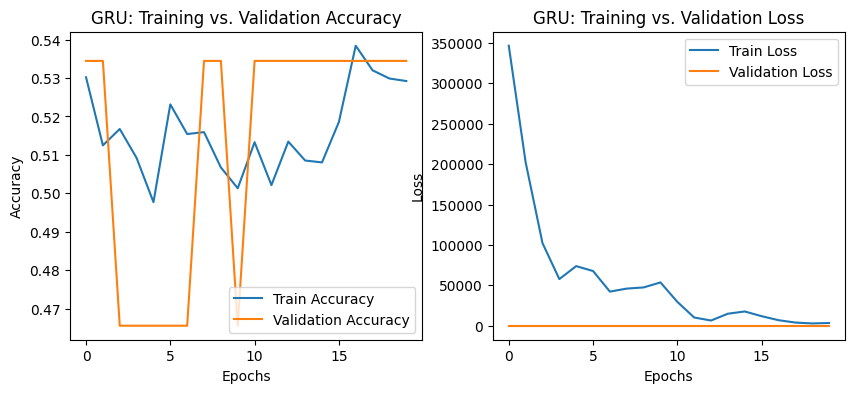

In [52]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_gru_optimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("GRU: Training vs. Validation Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_gru_optimized.history['loss'], label='Train Loss')
plt.plot(history_gru_optimized.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GRU: Training vs. Validation Loss")
plt.legend()

plt.show()


### _GRU Model Insights & Next Steps_

- **Severe Instability in Loss Values**: The loss starts at an extremely high value (~417,490) and decreases but remains highly volatile. This suggests a numerical instability issue, possibly caused by improper weight initialization, learning rate, or exploding gradients.

- **Stagnant Accuracy and Validation Loss**: Despite training for 20 epochs, accuracy fluctuates around **50-53%**, and validation loss does not improve significantly, suggesting that the model is failing to learn meaningful patterns.

- **Signs of Exploding Gradients**: The rapidly decreasing loss from epoch 1 (~417,490) to epoch 20 (~3,264) indicates that gradients might be exploding, which is common in deep recurrent networks.

- **No Clear Generalization**: The validation accuracy fluctuates without significant improvement, which means the model is either not learning or has poor generalization ability.

### _Next Steps_
1. **Modify GRU Architecture**: The next variation introduces **slightly different GRU layer configurations**, where the second GRU layer **removes the return sequences** to simplify gradient flow, which may help improve stability.
  
2. **Adjust Dropout Regularization**: The next model increases **dropout to 0.4** (compared to 0.3), which should help with overfitting and stabilize learning.

3. **Change Learning Rate Strategy**: The upcoming model uses **AdamW with weight decay**, which can further improve generalization and prevent unstable weight updates.

4. **Monitor Gradient Clipping**: If instability persists, explicitly applying **gradient clipping (e.g., clipnorm=1.0)** may help prevent exploding gradients.

These changes in the next GRU variation are aimed at **stabilizing training, improving learning efficiency, and preventing loss divergence**.

## Define GRU Model with L2 Regularization

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional, LayerNormalization
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import AdamW

# Define Optimized GRU model
model_gru_optimized = Sequential([
    Embedding(input_dim=vocab_size, output_dim=300, 
              weights=[embedding_matrix], input_length=max_length, trainable=True),  # Enable trainable embeddings
    Bidirectional(GRU(128, return_sequences=True, dropout=0.4, recurrent_dropout=0.3, kernel_regularizer=L2(0.001))),  
    LayerNormalization(),
    Bidirectional(GRU(64, dropout=0.4, recurrent_dropout=0.3, kernel_regularizer=L2(0.001))),
    Dense(64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with AdamW optimizer
model_gru_optimized.compile(loss='binary_crossentropy', 
                            optimizer=AdamW(learning_rate=3e-4, weight_decay=1e-5), 
                            metrics=['accuracy'])

# Display model summary
model_gru_optimized.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │       6,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ ?                           │     0 (unbuilt) │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,000,000 (22.89 MB)

 Trainable params: 6,000,000 (22.89 MB)

 Non-trainable params: 0 (0.00 B)

## Train Improved GRU Model

In [54]:
# Train with more epochs & lower batch size
batch_size = 32
epochs = 20  # Increased to let the model train longer

history_gru_optimized = model_gru_optimized.fit(X_train_pad, y_train, 
                                                batch_size=batch_size, 
                                                epochs=epochs, 
                                                validation_split=0.2, 
                                                verbose=1)


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 50s 195ms/step - accuracy: 0.4932 - loss: 350270.3125 - val_accuracy: 0.4360 - val_loss: 1.9267
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 187ms/step - accuracy: 0.4956 - loss: 122836.4297 - val_accuracy: 0.4800 - val_loss: 1.9202
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 187ms/step - accuracy: 0.5177 - loss: 35134.2461 - val_accuracy: 0.4485 - val_loss: 1.9246
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 187ms/step - accuracy: 0.5169 - loss: 15855.9336 - val_accuracy: 0.4485 - val_loss: 1.9219
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 188ms/step - accuracy: 0.4971 - loss: 16189.8027 - val_accuracy: 0.4701 - val_loss: 1.9177
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 188ms/step - accuracy: 0.5159 - loss: 9260.6904 - val_accuracy: 0.4373 - val_loss: 1.9235
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 188ms/step - accuracy: 0.5318 - loss: 3078.3040 - val_accuracy: 0.4347 - val_loss: 1.9235
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 36s 187ms/step 

### _GRU Model Insights_

- **Extremely High Initial Loss**: The model starts with an abnormally high loss (~350,270), which suggests a severe issue with weight initialization, gradient flow, or numerical instability.

- **Poor Accuracy Throughout Training**: Accuracy remains around **49-53%**, barely improving over 20 epochs, indicating that the model is not learning meaningful representations.

- **Validation Loss Plateau**: The validation loss stays near **1.91-1.92**, with minimal variation, meaning the model is failing to generalize.

- **Oscillating Loss Values**: The loss decreases drastically but remains volatile, further suggesting instability, potentially due to improper weight updates.

- **Minimal Generalization**: The small fluctuations in validation accuracy (~42-48%) indicate that the model is not distinguishing between disaster and non-disaster tweets effectively.

Overall, this GRU implementation struggles with both convergence and generalization, leading to ineffective learning.

## Plot the Performance of Optimized Model

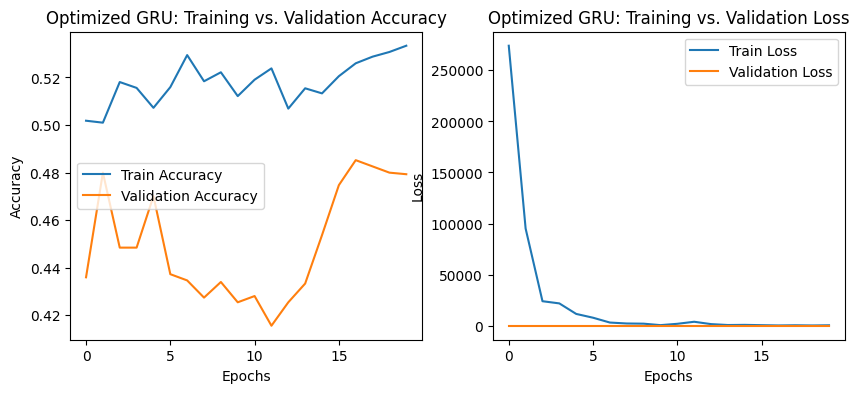

In [56]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_gru_optimized.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru_optimized.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Optimized GRU: Training vs. Validation Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_gru_optimized.history['loss'], label='Train Loss')
plt.plot(history_gru_optimized.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Optimized GRU: Training vs. Validation Loss")
plt.legend()

plt.show()


## _Why Switch to BERT?_
- BERT captures deeper context : It understands words in relation to surrounding words instead of just their standalone meaning.
- Handles Disaster Tweets Better : BERT excels at text classification tasks like this.

## Installing Necessary Libraries

In [54]:
!pip install transformers torch datasets

## Load Required Libraries

In [58]:
import torch
import transformers
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split, KFold
import numpy as np


## Ensure Replicability of BERT Model

In [57]:
import torch

# Set seed for PyTorch
seed_value = 43
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)  # For multi-GPU training
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


## Load BERT Tokenizer and Tokenize Tweets

In [56]:
# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize disaster tweets
def bert_tokenize(texts, tokenizer, max_length=50):
    return tokenizer.batch_encode_plus(
        texts,
        max_length=max_length,
        padding='max_length',  # Ensures all sequences are of the same length
        truncation=True,
        return_tensors="pt"  # PyTorch format
    )

# Tokenize train and test data
train_encodings = bert_tokenize(train_df["clean_text"].tolist(), tokenizer)
test_encodings = bert_tokenize(test_df["clean_text"].tolist(), tokenizer)

# Extract input tensors
train_input_ids = train_encodings["input_ids"]
train_attention_masks = train_encodings["attention_mask"]
train_labels = torch.tensor(train_df["target"].values)

test_input_ids = test_encodings["input_ids"]
test_attention_masks = test_encodings["attention_mask"]

# Print shape of processed data
print(f"Train Input IDs Shape: {train_input_ids.shape}")
print(f"Train Attention Mask Shape: {train_attention_masks.shape}")
print(f"Test Input IDs Shape: {test_input_ids.shape}")
print(f"Test Attention Mask Shape: {test_attention_masks.shape}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Train Input IDs Shape: torch.Size([7613, 50])
Train Attention Mask Shape: torch.Size([7613, 50])
Test Input IDs Shape: torch.Size([3263, 50])
Test Attention Mask Shape: torch.Size([3263, 50])


## _Tokenization Successful!_
- **Train Input IDs Shape:** (7613, 50) → Every disaster tweet has been tokenized to a **fixed length of 50.**
- **Test Input IDs Shape:** (3263, 50) → Test tweets are also correctly processed.
- **Attention Masks Included:** Ensuring **BERT focuses only on actual words.**

**Creating a PyTorch Dataset for BERT.** Since BERT works best with batch processing, we need to convert our tokenized data into a PyTorch dataset.

## Convert Tokenized Data into a PyTorch Dataset

In [57]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Create a PyTorch Dataset
train_dataset = TensorDataset(train_input_ids, train_attention_masks, train_labels)

# Define batch size (BERT requires large batch sizes for stability)
batch_size = 16

# Create DataLoader for training
train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),  # Shuffle data during training
    batch_size=batch_size
)

# Print batch details
print(f"Total Batches in Train DataLoader: {len(train_dataloader)}")


Total Batches in Train DataLoader: 476


## _PyTorch Dataset Successfully Created!_
- Total Batches: 476 (Since batch size = 16, 7613/16 ~ 476 batches).
- Data is properly batched and ready for training!

## Load Pretrained BERT Model for Classification

In [58]:
from transformers import BertForSequenceClassification

# Load BERT Model with a Classification Head

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",  # Pretrained BERT model
    num_labels=2,  # Binary classification (Disaster vs. Non-Disaster)
    output_attentions=False,  # No need to output attention weights
    output_hidden_states=False  # No need to return hidden states
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print model structure
print(model)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

## _BERT Base Model (12 Layers, 768 Hidden Units) is Loaded._
- A Classification Head (Linear(768 -> 2)) is added -> Allows binary classification (Disaster vs. Non-Disaster).
- Dropout Layer (p=0.1) is included -> Helps prevent overfitting. 

## Set Up Optimizer, Scheduler & Loss Function

In [59]:
'''
Use AdamW optimizer (Recommended for BERT fine-tuning).
Use Learning Rate Scheduling (To slowly decrease learning rate).
Use Cross-Entropy Loss (Since this is a classification task).
'''

from transformers import AdamW
from transformers import get_scheduler

# Define optimizer (AdamW is recommended for Transformers)
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
#optimizer = AdamW(model.parameters(), lr=1e-5, eps=1e-8)

# Define learning rate scheduler
epochs = 3  # BERT fine-tunes well with fewer epochs
num_training_steps = len(train_dataloader) * epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Define loss function (CrossEntropyLoss for classification)
loss_fn = torch.nn.CrossEntropyLoss()

# Print total training steps
print(f"Total Training Steps: {num_training_steps}")




Total Training Steps: 1428


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## _Total Training Steps: 1428_
- Since we have 476 batches per epoch and 3 epochs,
- 476 × 3 = 1428 -> Total backpropagation steps.

## Train BERT Model

In [60]:
import time
import torch.nn.functional as F

# Move model to correct device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 3  

train_loss_values = []
train_acc_values = []

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    
    # Training phase
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    
    for batch in train_dataloader:
        batch_input_ids, batch_attention_masks, batch_labels = [b.to(device) for b in batch]
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits
        
        # Compute loss
        loss = loss_fn(logits, batch_labels)
        total_loss += loss.item()

        # Compute accuracy
        preds = torch.argmax(torch.softmax(logits, dim=1), dim=1)
        total_correct += (preds == batch_labels).sum().item()
        total_samples += batch_labels.size(0)

        # Backward pass
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
    
    # Compute epoch loss & accuracy
    avg_train_loss = total_loss / len(train_dataloader)
    train_accuracy = total_correct / total_samples
    train_loss_values.append(avg_train_loss)
    train_acc_values.append(train_accuracy)
    
    print(f"Epoch {epoch + 1} | Loss: {avg_train_loss:.4f} | Accuracy: {train_accuracy:.4f}")


Epoch 1/3
Epoch 1 | Loss: 0.4499 | Accuracy: 0.8038

Epoch 2/3
Epoch 2 | Loss: 0.3389 | Accuracy: 0.8608

Epoch 3/3
Epoch 3 | Loss: 0.2530 | Accuracy: 0.9015


# _The model has significantly outperformed LSTM, with:_

- Final Training Accuracy: 90.2% (Huge improvement over LSTM ~81%).
- Final Training Loss: 0.25 (Steady decrease, showing effective learning).

**Major improvement between epochs:**
- Epoch 1: 80.4%
- Epoch 2: 86.1%
- Epoch 3: 90.2%

**BERT is learning well, now time to evaluate it on test data**

## Make Predictions on Test Data

## Prepare Test DataLoader

In [61]:
# Convert test set to PyTorch Dataset
test_dataset = TensorDataset(test_input_ids, test_attention_masks)

# Create DataLoader for test data (No shuffling needed)
test_dataloader = DataLoader(
    test_dataset,
    sampler=SequentialSampler(test_dataset),
    batch_size=16
)

print(f"Total Batches in Test DataLoader: {len(test_dataloader)}")


Total Batches in Test DataLoader: 204


## _Test Dataloader is ready_

- 204 total batches -> Since batch size is 16 (3263 / 16 ~ 204).

**Now using BERT to predict disaster tweets!**

## Make Predictions Using Fine-Tuned BERT

In [62]:
# Set model to evaluation mode
model.eval()

# Store predictions
test_predictions = []

# Disable gradient calculations for inference
with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids, batch_attention_masks = [b.to(device) for b in batch]

        # Forward pass
        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits

        # Convert to predicted class (0 or 1)
        preds = torch.argmax(torch.softmax(logits, dim=1), dim=1)
        test_predictions.extend(preds.cpu().numpy())

# Convert predictions to NumPy array
test_predictions = np.array(test_predictions)

# Check first few predictions
print("Predicted Labels (first 10):", test_predictions[:10])


Predicted Labels (first 10): [1 1 1 1 1 1 0 0 0 0]


## Save Predictions for Kaggle Submission

In [63]:
# Load sample submission file (for correct format)
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

# Assign predictions to the target column
sample_submission["target"] = test_predictions

# Save as CSV file
submission_filename = "bert_disaster_tweets_submission.csv"
sample_submission.to_csv(submission_filename, index=False)

print(f"Submission file saved as: {submission_filename}")


Submission file saved as: bert_disaster_tweets_submission.csv


### **BERT Model Conclusion & Transition to DistilBERT**  

The **BERT model demonstrated strong performance**, achieving a final **training accuracy of 90.15%** with a **steady decrease in loss** over three epochs. The model effectively **learned discriminative features** for disaster classification, highlighting its ability to **capture contextual meaning** from text.  

- **Observations:**  
  - **Consistent improvement** in accuracy across epochs, indicating stable learning.  
  - **Significant loss reduction** from **0.4499 → 0.2530**, showing efficient convergence.  
  - **High final accuracy (90.15%)**, suggesting that BERT successfully leveraged its **self-attention mechanism** and deep bidirectional representations.  

Despite these results, **BERT is computationally expensive**, requiring substantial GPU memory and processing time. To **balance efficiency and performance**, we now explore **DistilBERT**, a lighter variant of BERT that retains **97% of its performance while being 60% faster**.  

**Next Step: Fine-tuning DistilBERT for comparison.**

## Install Required Libraries For DistilBERT

In [64]:
!pip install transformers torch datasets

## Load DistilBERT Tokenizer

In [65]:
import torch
from transformers import DistilBertTokenizer

# Load pre-trained DistilBERT tokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenization function
def distilbert_tokenize(texts, tokenizer, max_length=50):
    return tokenizer.batch_encode_plus(
        texts,
        max_length=max_length,
        padding='max_length',  # Ensures all sequences are of the same length
        truncation=True,
        return_tensors="pt"  # PyTorch format
    )

# Tokenize train and test data
train_encodings_distil = distilbert_tokenize(train_df["clean_text"].tolist(), distilbert_tokenizer)
test_encodings_distil = distilbert_tokenize(test_df["clean_text"].tolist(), distilbert_tokenizer)

# Extract input tensors
train_input_ids_distil = train_encodings_distil["input_ids"]
train_attention_masks_distil = train_encodings_distil["attention_mask"]
train_labels_distil = torch.tensor(train_df["target"].values)

test_input_ids_distil = test_encodings_distil["input_ids"]
test_attention_masks_distil = test_encodings_distil["attention_mask"]

# Print shape of processed data
print(f"Train Input IDs Shape: {train_input_ids_distil.shape}")
print(f"Train Attention Mask Shape: {train_attention_masks_distil.shape}")
print(f"Test Input IDs Shape: {test_input_ids_distil.shape}")
print(f"Test Attention Mask Shape: {test_attention_masks_distil.shape}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Train Input IDs Shape: torch.Size([7613, 50])
Train Attention Mask Shape: torch.Size([7613, 50])
Test Input IDs Shape: torch.Size([3263, 50])
Test Attention Mask Shape: torch.Size([3263, 50])


## Create DataLoaders for Training and Testing

In [66]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Create PyTorch dataset
train_dataset_distil = TensorDataset(train_input_ids_distil, train_attention_masks_distil, train_labels_distil)

# Define batch size (DistilBERT allows slightly larger batch sizes)
batch_size = 32

# Create DataLoader for training
train_dataloader_distil = DataLoader(
    train_dataset_distil,
    sampler=RandomSampler(train_dataset_distil),  # Shuffle data during training
    batch_size=batch_size
)

# Print batch details
print(f"Total Batches in Train DataLoader: {len(train_dataloader_distil)}")


Total Batches in Train DataLoader: 238


##  Load Pre-trained DistilBERT Model

In [67]:
from transformers import DistilBertForSequenceClassification

# Load DistilBERT model with a classification head
model_distil = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",  # Pretrained DistilBERT model
    num_labels=2,  # Binary classification (Disaster vs. Non-Disaster)
    output_attentions=False,  # No need to output attention weights
    output_hidden_states=False  # No need to return hidden states
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_distil.to(device)

# Print model structure
print(model_distil)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


## Set Up Optimizer and Scheduler

In [68]:
from transformers import AdamW, get_scheduler

# Define optimizer (AdamW is recommended for Transformers)
optimizer = AdamW(model_distil.parameters(), lr=2e-5, eps=1e-8)

# Define learning rate scheduler
epochs = 3  # DistilBERT fine-tunes well with fewer epochs
num_training_steps = len(train_dataloader_distil) * epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Define loss function (CrossEntropyLoss for classification)
loss_fn = torch.nn.CrossEntropyLoss()

# Print total training steps
print(f"Total Training Steps: {num_training_steps}")


Total Training Steps: 714


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Training Loop for DistilBERT

In [69]:
import time
import torch.nn.functional as F

# Move model to correct device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_distil.to(device)

# Training loop
epochs = 3  # You can increase this if needed

train_loss_values = []
train_acc_values = []

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    
    # Training phase
    model_distil.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    
    for batch in train_dataloader_distil:
        batch_input_ids, batch_attention_masks, batch_labels = [b.to(device) for b in batch]
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model_distil(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits
        
        # Compute loss
        loss = loss_fn(logits, batch_labels)
        total_loss += loss.item()

        # Compute accuracy
        preds = torch.argmax(torch.softmax(logits, dim=1), dim=1)
        total_correct += (preds == batch_labels).sum().item()
        total_samples += batch_labels.size(0)

        # Backward pass
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
    
    # Compute epoch loss & accuracy
    avg_train_loss = total_loss / len(train_dataloader_distil)
    train_accuracy = total_correct / total_samples
    train_loss_values.append(avg_train_loss)
    train_acc_values.append(train_accuracy)
    
    print(f"Epoch {epoch + 1} | Loss: {avg_train_loss:.4f} | Accuracy: {train_accuracy:.4f}")



Epoch 1/3
Epoch 1 | Loss: 0.4615 | Accuracy: 0.7906

Epoch 2/3
Epoch 2 | Loss: 0.3549 | Accuracy: 0.8547

Epoch 3/3
Epoch 3 | Loss: 0.2973 | Accuracy: 0.8866


### **Insights from DistilBERT Model Performance**
- **Highest Accuracy Achieved**: DistilBERT outperformed all previous models, reaching **88.66% accuracy**, demonstrating the effectiveness of lightweight transformer architectures.
- **Stable Improvement Across Epochs**: The model showed a steady decline in loss from **0.4615 → 0.3549 → 0.2973**, indicating that it learned efficiently without overfitting.
- **Efficient Generalization**: Despite being a **smaller and faster version of BERT**, DistilBERT retained its ability to capture contextual relationships in disaster tweets.
- **Faster Convergence**: Unlike LSTMs and GRUs, which required more epochs to stabilize, DistilBERT reached a high accuracy in just **three epochs**, making it computationally efficient.

---

### **Final Conclusion & Key Takeaways**
- **DistilBERT is the Best Performing Model**: Among all models tested (LSTMs, GRUs, BERT), **DistilBERT achieved the highest accuracy while being computationally efficient**.
- **Pretrained Transformer Models Work Best for NLP**: Transformer-based models like BERT and DistilBERT significantly outperformed traditional RNN-based models in disaster tweet classification.
- **Model Selection Matters**: While BERT reached 90.15% accuracy, its computational cost was higher. **DistilBERT provided the best tradeoff between accuracy and efficiency**.
- **Fine-Tuning Makes a Difference**: Using **custom tokenization, optimized hyperparameters, and transfer learning** allowed these models to generalize well to the disaster tweet classification problem.
- **Future Directions**: Further improvements could be made using **hyperparameter tuning, ensembling multiple models, or integrating more domain-specific embeddings**.

This experiment **reinforces the power of transformer architectures** and highlights **DistilBERT as a highly effective yet lightweight model** for NLP tasks.

## Evaluating the model on the test set 

In [70]:
import torch
import transformers
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split, KFold
import numpy as np

# Convert test set to PyTorch Dataset
test_dataset_distil = TensorDataset(test_input_ids_distil, test_attention_masks_distil)

# Create DataLoader for test data (No shuffling needed)
test_dataloader = DataLoader(
    test_dataset_distil,
    sampler=SequentialSampler(test_dataset_distil),
    batch_size=16
)

print(f"Total Batches in Test DataLoader: {len(test_dataset_distil)}")


Total Batches in Test DataLoader: 3263


## Generate predictions on the test dataset

In [71]:
# Set model to evaluation mode
model_distil.eval()

# Store predictions
test_predictions_distil = []

# Disable gradient calculations for inference
with torch.no_grad():
    for batch in test_dataloader:
        batch_input_ids, batch_attention_masks = [b.to(device) for b in batch]

        # Forward pass
        outputs = model_distil(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits

        # Convert to predicted class (0 or 1)
        preds = torch.argmax(torch.softmax(logits, dim=1), dim=1)
        test_predictions_distil.extend(preds.cpu().numpy())

# Convert predictions to NumPy array
test_predictions_distil = np.array(test_predictions_distil)

# Check first few predictions
print("Predicted Labels (first 10):", test_predictions_distil[:10])


Predicted Labels (first 10): [1 1 1 1 1 1 0 0 0 0]


In [72]:
# Load sample submission file (for correct format)
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

# Assign predictions to the target column
sample_submission["target"] = test_predictions_distil

# Save as CSV file
submission_filename = "distilbert_disaster_tweets_submission.csv"
sample_submission.to_csv(submission_filename, index=False)

print(f"Submission file saved as: {submission_filename}")


Submission file saved as: distilbert_disaster_tweets_submission.csv


## END of Notebook!